# <font color=coral>&#128640; Screenshot of Data Scientists' Payroll 2025 in Europe &#128176;</font>

## &#9889; _General_
 - **<font color='darkturquoise'>Scope</font>**: This <u>informal</u> case study aims to present a holistic/abstract overview of the Data Scientists' salaries across Europe.

 - **<font color='darkturquoise'>Objective</font>**: To answer the following questions:
  - Q1: _"How well paid is a Data Scientist in Europe relative to the general workforce?"_
  - Q2: _"Which European country/-ies is/are suitable for a Data Scientist' work, considering a sustainable standard of living?"_

 -  **<font color='darkturquoise'>Remarks</font>**:
  - The USD (\$) currency is chosen for consistency.  
  - Some official country names have been modified for simplicity.
  - There are a few Europen countries missing due to lack of data.

## &#x1F50E; _Parameters Used_ :
- **<font color=lawngreen>DS_Salary</font>**: The average Data Scientist's `gross annual salary` in USD (\$) found by country. For this analysis, the avarage salaries for different levels of experience has been collected, as follows:
  - Entry-Level &emsp;&nbsp; ( $<$ 2 years)
  - Early-Career &emsp;( 2 -- 5 years)
  - Mid-Level &emsp;&emsp;( 5 -- 10 years)
  - Senior-Level &emsp;( $>$ 10 years)

- **<font color=lawngreen>Gross & Net Income</font>**: `Gross` refers to the income earned (annually, monthly etc.) before any deductions. `Net` on the other hand, refers to the "take-home" income after deductions such as taxes, insurance, social portions etc. The currency is EUR (&euro;) and these estimates refer to a single person.

- **<font color=lawngreen>GNI_PPP</font>**: The `Gross National Income` measures the total income earned by a country's residents, regardless of whether that income is earned domestically or abroad. When expressed per capita and adjusted for purchasing power parity (GNI per capita PPP), you get a measure of the average income available to residents. This can be slightly different from GDP per capita PPP because it includes or excludes certain cross-border flows (like remittances, repatriated profits, etc). The currency is USD (&dollar;). Since the European countries lay above the HIC--High Income Countries ( $>$ &dollar;14000) threshold according to the World's Bank annual grouping, <u>there will be further informal relative-tiers for intra-European comparison</u>, as follows:
  - <font color=deepskyblue>Upper-High</font>: &emsp;&ensp; 75% Quantile $<$ GNI
  - <font color=springgreen>Midium-High</font>: &emsp; 25% Quantile $\le$ GNI $\le$ 75% Quantile
  - <font color=crimson>Lower-High</font>: &emsp;&ensp; GNI $<$ 25% Quantile

- **<font color=lawngreen>HDI</font>**: The `Human Development Index` is a metric compiled by the United Nations Development Programme back in 1990 and used to quantify a country's "average achievement" (HDI was created to emphasize that people and their capabilities should be the ultimate criteria for assessing the development of a country, not economic growth alone) in three basic dimensions of human development:
  - A long and healthy life (Life expectancy).
  - Knowledge (Education level backround), and
  - Having a decent standard of living (GNI included).

 &emsp;The Human Development Index (HDI) is divided into four tiers scaled 0-1:
 - <font color=deepskyblue>Very high</font> human development (0.8 -- 1.0)
 - <font color=springgreen>High</font> human development (0.7 -- 0.79)
 - <font color=orange>Medium</font> human development (0.55 -- 0.69)
 - <font color=crimson>Low</font> human development ($<$ 0.55)

- **<font color=lawngreen>QoL</font>**: The `Quality-of-Life index` is designed to provide a comparative measure, where a <u>higher index value indicates a better quality of life</u>. The QoL is an estimation of the overall quality of life by using an empirical formula that takes into account the following factors:
  - Purchasing Power Index (higher is better).
  - Pollution Index (lower is better).
  - House Price to Income Ratio (lower is better).
  - Cost of Living Index (lower is better).
  - Safety Index (higher is better).
  - Health Care Index (higher is better).
  - Traffic Commute Time Index (lower is better).
  - Climate Index (higher is better).
  
- **<font color=lawngreen>CoL</font>**: The `Cost-of-Living index` indicates the relative prices of consumer goods like groceries, restaurants, transportation, and utilities, including rent, relative to New York City (NYC), with a baseline index of 100% for NYC. The lower CoL, the better. The CoL is calculated from the source based on estimated average expenses for a 4-person family in a specific city.


## &#x1F4C5; _Phases_:
  1. [ETL](#etl) (Extract-Transform-Load)
  2. [EDA](#eda) (Exploratory Data Analysis)
  3. [Objective](#ob) (Answering the Questions)

## &#128722; _Resources_:
- [Cityjobs](https://www.cityjobs.info/) &emsp; Data Scientists' Salaries
- [EUROSTAT](https://salarymonitor.org/world-countries-average-salary) &emsp; [ONS](https://www.ons.gov.uk/) &emsp; [INSTAT](https://www.instat.gov.al/en/themes/labour-market-and-education/wages/#tab3) &emsp;  [Wikipedia](https://en.wikipedia.org/wiki/List_of_European_countries_by_average_wage) &emsp;  Average gross and net salaries
- [Wikipedia](https://en.wikipedia.org/wiki/ISO_3166-1) &emsp; Countries ISO-alpha Codes
- [WorldBank](https://data.worldbank.org/indicator/ny.gnp.pcap.pp.cd) &emsp; GNI per Capita PPP
- [United Nations Development Programme](https://hdr.undp.org/data-center/human-development-index#/indicies/HDI) &emsp; HDI
- [NUMBEO](https://www.numbeo.com/quality-of-life/rankings_by_country.jsp) &emsp; QoL
- [NUMBEO](https://www.numbeo.com/cost-of-living/cpi_explained.jsp) &emsp; CoL

In [2]:
import random
import re
import time
from datetime import datetime
from glob import glob
import shutil
import os
import json
import pickle

import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
from scipy.stats import iqr, skew, kurtosis, pearsonr, spearmanr

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
%matplotlib inline

In [3]:
pd.options.display.max_columns = 100

<a name='etl'></a>
##   ⚙️ ETL
In this phase, we are going to implement the ETL process as follows:
- [Ectract](#ex): Gather the data we need from multiple resources as mentioned in the beginning.
- [Transform](#tr): Preprocess the data and keep what we need for the project.
- [Load](#lo): Store our data for further analysis.

<a name='ex'></a>
### _Ectract_



In [ ]:
'''
TODO: 1. retrieve the gni_ppp in a zipped format
      2. unzip the gni_ppp
      3. delete the zipped gni_ppp file for clearer environment
      4. get the path for the gni_ppp .csv file
      5. move the gni .csv file to the working directory
      6. delete the unzipped gni_ppp folder for clearer environment
'''
!wget -O gni_ppp_downloaded 'https://api.worldbank.org/v2/en/indicator/NY.GNP.PCAP.PP.CD?downloadformat=csv'
!unzip -q 'gni_ppp_downloaded' -d 'gni_ppp_unziped'
!rm -rf 'gni_ppp_downloaded'
path_gni_ppp = glob('*/A*.csv')[0]
shutil.move(path_gni_ppp, 'gni_ppp.csv')
shutil.rmtree('gni_ppp_unziped')

--2025-01-21 10:57:32--  https://api.worldbank.org/v2/en/indicator/NY.GNP.PCAP.PP.CD?downloadformat=csv
Resolving api.worldbank.org (api.worldbank.org)... 104.18.42.231, 172.64.145.25, 2606:4700:4400::6812:2ae7, ...
Connecting to api.worldbank.org (api.worldbank.org)|104.18.42.231|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44903 (44K) [application/zip]
Saving to: ‘gni_ppp_downloaded’

gni_ppp_downloaded  100%[===================>]  43.85K  --.-KB/s    in 0.03s   

2025-01-21 10:57:32 (1.65 MB/s) - ‘gni_ppp_downloaded’ saved [44903/44903]



In [ ]:
def get_content(url):
  response = requests.get(url)

  if response:
    html_content = response.content

  soup = BeautifulSoup(html_content, 'html.parser')
  return soup

In [ ]:
def extract_european_countries() -> pd.DataFrame:
  '''
    This func retrieves the countries we want to examine
  '''
  path = 'european_countries.csv'
  countries_regions = pd.read_csv(path)
  return countries_regions

In [ ]:
def extract_ds_salaries(countries_df) -> pd.DataFrame:
  '''
    This func retrieves average data scientis' salaries.
  '''
  # get the european country names we want to examine and format them accordingly for the web-search
  countries = list(countries_df['country'].replace(to_replace=r'\s', value='-', regex=True).str.lower())

  # the main path we'll use to iterate through countries next
  url = 'https://www.cityjobs.info/job-descriptions/data-scientist/salary/'

  # getting the content for each country from the website
  contents = []
  for country in countries:
    if country == 'turkiye':
      country = 'turkey'

    path = os.path.join(url, country)
    content = get_content(path)
    contents.append(content)
    sleep_time = random.randint(5, 10)
    time.sleep(sleep_time)

  # getting the appropriate table for each country, if any
  tables = []
  for i, content in enumerate(contents):
    if content.find_all('table'):
      tables.append(content.find_all('table')[1])
    else:
      countries_df = countries_df.drop(i, axis=0)

  # getting the data we need from each table (reffering to a country)
  all_salaries = []

  for i, table in enumerate(tables):
    rows = table.find_all('tr')[1:5]

    salaries = []

    for row in rows:
      data = row.find_all('td')
      salaries.append(data[3].text.strip())

    all_salaries.append(salaries)

  # creating a dataframe including the salaries for different experience levels
  col_names = ['entry', 'early', 'mid', 'senior']
  salaries_df = pd.DataFrame(all_salaries, columns=col_names)

  # combining the countries with salaries found
  countries_df.reset_index(drop=True, inplace=True)
  salaries_countries_df = pd.concat([countries_df, salaries_df], axis=1)

  return salaries_countries_df

In [ ]:
def extract_gross_net_avg_salaries() -> pd.DataFrame:
  '''
    This func retrieves average gross and net salaries.
  '''
  path = 'gross_net_avg_salaries.csv'
  ds_salaries = pd.read_csv(path)
  return ds_salaries

In [ ]:
def extract_qol_idx() -> pd.DataFrame:
  '''
    This func retrieves the Quality-of-Life index
  '''
  # get the content
  numbeo_qol_content = get_content('https://www.numbeo.com/quality-of-life/rankings_by_country.jsp')

  # finding the right data
  rows = numbeo_qol_content.find('tbody').find_all('tr')

  # keeping the data we want from the table in list of tuples for each country
  data_list = []
  for row in rows:
    data = row.find_all('td')
    data_list.append((data[1].text.strip(), data[2].text.strip(), data[3].text.strip(),
                      data[4].text.strip(), data[5].text.strip(), data[6].text.strip(),
                      data[7].text.strip(), data[8].text.strip(), data[9].text.strip(),
                      data[10].text.strip()))

  # declaring column names for the dataframe
  col_names = ['country', 'QoL_idx', 'Purchasing_Power_idx', 'Safety_idx', 'Healthcare_idx',
              'CoL_idx', 'PropertyPrice_to_Income_Ratio', 'TrafficCommuteTime_idx',
               'Pollution_idx', 'Climate_idx']

  # storing the data for each country in a dataframe
  qol_per_country_df = pd.DataFrame(data_list, columns=col_names)

  return qol_per_country_df

In [ ]:
def extract_col_index() -> pd.DataFrame:
  '''
    This func retrieves the Cost-of-Living index
  '''
  # get the content
  numbeo_col_content = get_content('https://www.numbeo.com/cost-of-living/rankings_by_country.jsp')

  # finding the right data
  rows = numbeo_col_content.find('tbody').find_all('tr')

  # keeping the data we want from the table in list of tuples for each country
  data_list = []
  for row in rows:
    data = row.find_all('td')
    data_list.append((data[1].text.strip(), data[2].text.strip(), data[3].text.strip(),
                      data[4].text.strip(), data[5].text.strip(),
                      data[6].text.strip(), data[7].text.strip()))

  # declaring column names for the dataframe
  col_names = ['country', 'CoL_idx', 'Rent_idx', 'CoL_plus_Rent_idx', 'Groceries_idx',
               'RestaurantPrice_idx', 'LocalPurchasingPower_idx']

  # storing the data for each country in a dataframe
  col_per_country_df = pd.DataFrame(data_list, columns=col_names)

  return col_per_country_df

In [ ]:
def extract_alpha_codes() -> pd.DataFrame:
  '''
    This func retrieves iso-alpha2 and iso-alpha3 codes of countries.
  '''

  # retrieve content from url
  url = 'https://en.wikipedia.org/wiki/ISO_3166-1'
  alpha_content = get_content(url)

  # get the data from the table we need
  tables = alpha_content.find_all('table')
  table = tables[1] #choose the right table to work on

  rows = table.find_all('tr')[1:] # exclude header row from table

  codes = []
  for row in rows:
    data = row.find_all('td')
    data0 = data[0].text.strip().split('[')[0] #country
    data1 = data[1].text.strip() #alpha2
    data2 = data[2].text.strip() #alpha3
    codes.append((data0, data1, data2))

  # create dataframe and return data to the user
  codes_df = pd.DataFrame(codes, columns=['country', 'alpha2', 'alpha3'])

  return codes_df

In [ ]:
def extract_gni() -> pd.DataFrame:
  '''
    This func retrieves gni_ppp for the year 2023
  '''
  path = 'gni_ppp.csv'
  gni = pd.read_csv(path)

  gni_columns = ['country', 'alpha3', '2023']
  gni = gni[gni_columns]

  return gni

In [ ]:
def extract_hdi() -> pd.DataFrame:
  '''
    This func retrieves the Human Development Index
  '''
  path = 'hdi.csv'
  hdi = pd.read_csv(path)

  hdi_columns = ['country', 'HdiTier', 'Hdi2022']
  hdi = hdi[hdi_columns]
  hdi = hdi.loc[:191]

  return hdi

<a name='tr'></a>
###_Transformation Process_
Defining transform functions that:

+ <u>Removes</u> unnecessary panctuation and symbols from currency related data and transorm them to numeric values.
+ <u>Manipulates</u> the country names for consistency.
+ <u>Selects</u> the featured data for further usage.

In [ ]:
# modifyied country names for alignment
alt_country_names = {'Bosnia And Herzegovina':'Bosnia and Herzegovina',
                     'Moldova, Republic of' : 'Moldova',
                     'Netherlands, Kingdom of the' : 'Netherlands',
                     'Russian Federation' : 'Russia',
                     'Türkiye' : 'Turkiye',
                     'Turkey' : 'Turkiye',
                     'United Kingdom of Great Britain and Northern Ireland' : 'United Kingdom'}

# current EUR -> USD exchange rate
exchange_rate = 1.0516

In [ ]:
def transform_ds_salaries(salaries, exchange_rate = exchange_rate) -> pd.DataFrame:
  '''
    This func manipulates the salaries dataframe.
  '''
  # removing ($) symbol, thousands (,) separator and transforming salaries into numeric values
  def remove_symbols(x):
    x = re.sub('[\$,]', '', x)
    return float(x)

  cols = ['entry', 'early', 'mid', 'senior']

  salaries[cols] = salaries[cols].apply(lambda x: x.apply(remove_symbols))

  # sort countries
  salaries.sort_values(by='country', inplace=True)
  salaries.reset_index(drop=True, inplace=True)

  return salaries

In [ ]:
def transform_alpha_codes(codes, alt_country=alt_country_names) -> pd.DataFrame:
  '''
    This func manipulates the alpha_codes dataframe.
  '''
  # manipulate country names we need
  codes['country'] = codes['country'].replace(alt_country)

  # sort dataframe by country name
  codes.sort_values(by='country', inplace=True)
  codes.reset_index(drop=True, inplace=True)

  return codes

In [ ]:
def transform_gross_net_avg_salaries(gross_net_salaries, exchange_rate=exchange_rate) -> pd.DataFrame:
  '''
    This func manipulates the gross and net average salaries.
  '''
  gross_net_salaries.rename(columns={'avg_gross_salary' : 'gross_salary',
                                     'avg_net_salary' : 'net_salary'}, inplace=True)
  # convert EUR -> USD
  gross_net_salaries['gross_salary'] = gross_net_salaries['gross_salary'].astype(float)
  gross_net_salaries['gross_salary'] = gross_net_salaries['gross_salary'] * exchange_rate
  gross_net_salaries['gross_salary'] = gross_net_salaries['gross_salary'].round(2)

  gross_net_salaries['net_salary'] = gross_net_salaries['net_salary'].astype(float)
  gross_net_salaries['net_salary'] = gross_net_salaries['net_salary'] * exchange_rate
  gross_net_salaries['net_salary'] = gross_net_salaries['net_salary'].round(2)

  # sort dataframe by country name
  gross_net_salaries.sort_values(by='country', inplace=True)
  gross_net_salaries.reset_index(drop=True, inplace=True)

  return gross_net_salaries

In [ ]:
def transform_gni(gni, alt_names=alt_country_names) -> pd.DataFrame:
  '''
    This func manipulates the gross national income.
  '''
  # altering country names for alignment
  gni['country'] = gni['country'].replace(alt_names)

  colmns = ['country', 'alpha3', '2023']
  gni = gni[colmns]
  gni.rename(columns={'2023' : 'gni'}, inplace=True)

  # sort dataframe by country name
  gni.sort_values(by='country', inplace=True)
  gni.reset_index(drop=True, inplace=True)

  return gni

In [ ]:
def transform_hdi(hdi, alt_names=alt_country_names) -> pd.DataFrame:
  '''
    This func manipulates the human development index.
  '''
  # altering country names for alignment
  hdi['country'] = hdi['country'].replace(alt_names)

  colmns = ['country', 'HdiTier', 'Hdi2022']
  hdi = hdi[colmns]
  hdi.rename(columns={'HdiTier' : 'hdi_tier', 'Hdi2022' : 'hdi'}, inplace=True)

  # sort dataframe by country names
  hdi.sort_values(by='country', inplace=True)
  hdi.reset_index(drop=True, inplace=True)

  return hdi

In [ ]:
def transform_qol_idx(qol_idx, alt_names=alt_country_names) -> pd.DataFrame:
  '''
    This func manipulates the Quality-of-Life index.
  '''
  # altering country names and casting numbers
  qol_idx['country'] = qol_idx['country'].replace(alt_names)
  qol_idx['QoL_idx'] = qol_idx['QoL_idx'].astype(float)

  cols = ['Purchasing_Power_idx', 'Safety_idx', 'Healthcare_idx', 'PropertyPrice_to_Income_Ratio',
          'TrafficCommuteTime_idx', 'Pollution_idx', 'Climate_idx', 'CoL_idx']

  qol_idx.drop(columns=cols, inplace=True)

  # sorting by country
  qol_idx.sort_values(by='country', inplace=True)
  qol_idx.reset_index(drop=True, inplace=True)

  return qol_idx

In [ ]:
def transform_col_idx(col_idx, alt_names=alt_country_names) -> pd.DataFrame:
  '''
    This func manipulates the Cost-of-Living index.
  '''
  # altering country names and casting numbers
  col_idx['country'] = col_idx['country'].replace(alt_names)
  col_idx['CoL_idx'] = col_idx['CoL_idx'].astype(float)
  col_idx['CoL_plus_Rent_idx'] = col_idx['CoL_plus_Rent_idx'].astype(float)

  cols = ['Rent_idx', 'Groceries_idx', 'RestaurantPrice_idx', 'LocalPurchasingPower_idx']

  col_idx.drop(columns=cols, inplace=True)

  # sorting by country
  col_idx.sort_values(by='country', inplace=True)
  col_idx.reset_index(drop=True, inplace=True)

  return col_idx

In [ ]:
def transform_data(iso_codes, salaries, gross_net_salaries, gni, hdi, qol, col) -> pd.DataFrame:
  '''
    This func merges all the data into one dataframe.
  '''
  merged_df = (iso_codes.merge(salaries, how='inner', on='country')
              .merge(gross_net_salaries, how='inner', on='country')
              .merge(gni, how='inner', on=['country', 'alpha3'])
              .merge(hdi, how='inner', on='country')
              .merge(qol, how='inner', on='country')
              .merge(col, how='inner', on='country'))

  return merged_df

<a name='lo'></a>
###_Load Process_
Defining a load function that takes a dataframe and load it to a .csv file named 'etl_data.csv' making sure to set index to False (so not to have double indexing in the .csv file)

In [ ]:
def load(data_in, path_to):

  # write the tranformed data to the destined file excluding the index
  data_in.to_csv(path_to, index=False)

In [ ]:
def log(msg):
  '''
    This func creates a log file with the current timestamp.
  '''

  # getting the current timestamp
  now = datetime.now()

  # the format we're going to use for our timestamp : Year-Monthname-Day-Hour-Minute-Second
  timestamp_format = '%Y-%h-%d-%H:%M:%S'

  # formating the current timestamp to our favor
  timestamp = now.strftime(timestamp_format)

  # append the timestamp of the running process to a log file
  with open("ETL_log.txt", "a") as f:
      f.write(timestamp + ',' + msg + '\n')

### _ETL Process_

In [ ]:
def etl():
  log("ETL Job Started")

  #>>>>>>>>>> Extract <<<<<<<<<<
  log("Extract Phase Started")
  extracted_countries = extract_european_countries()
  extracted_salaries = extract_ds_salaries(extracted_countries)
  extracted_gross_net_salaries = extract_gross_net_avg_salaries()
  extracted_qol_idx = extract_qol_idx()
  extracted_col_idx = extract_col_index()
  extracted_iso_codes = extract_alpha_codes()
  extracted_gni = extract_gni()
  extracted_hdi = extract_hdi()
  log('Extract Phase Ended')

  #>>>>>>>>>> Transform <<<<<<<<<<
  log('Transform Phase Started')
  transformed_iso_codes = transform_alpha_codes(extracted_iso_codes)
  transformed_salaries = transform_ds_salaries(extracted_salaries)
  transformed_gross_net_salaries = transform_gross_net_avg_salaries(extracted_gross_net_salaries)
  transformed_gni = transform_gni(extracted_gni)
  transformed_hdi = transform_hdi(extracted_hdi)
  transformed_qol = transform_qol_idx(extracted_qol_idx)
  transformed_col = transform_col_idx(extracted_col_idx)
  transformed_data = transform_data(transformed_iso_codes, transformed_salaries,
                                    transformed_gross_net_salaries, transformed_gni,
                                    transformed_hdi, transformed_qol, transformed_col)
  log('Transform Phase Ended')

  #>>>>>>>>>> Load <<<<<<<<<<
  log('Load Phase Started')
  load(transformed_data, 'ds_salaries_df.csv')
  log('Load Phase Ended')

  log("ETL Job Ended")

  print('ETL Process Complete!')

In [ ]:
etl()

ETL Process Complete!


<a name='eda'></a>
## &#128202; _EDA_

In this section we will have an `overview of the data` getting some `meeningful isights`.

In [ ]:
df = pd.read_csv('etl_data.csv')

In [ ]:
df.head(3)

,country,alpha2,alpha3,region,entry,early,mid,senior,gross_salary,net_salary,gni,hdi_tier,hdi,QoL_idx,CoL_idx
0,Albania,AL,ALB,Southern Europe,12780.0,14484.0,17040.0,19596.0,9909.02,8025.62,21650.0,High,0.789,104.3,39.9
1,Austria,AT,AUT,Western Europe,52713.0,59741.0,70284.0,80827.0,60027.69,40441.54,72910.0,Very High,0.926,192.9,60.7
2,Belarus,BY,BLR,Eastern Europe,10341.0,11720.0,13788.0,15856.0,8833.44,7609.38,29690.0,Very High,0.801,127.5,25.0


In [ ]:
print(df.info(), end='\n\n')
print(f"Dataframe's shape: {df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       36 non-null     object 
 1   alpha2        36 non-null     object 
 2   alpha3        36 non-null     object 
 3   region        36 non-null     object 
 4   entry         36 non-null     float64
 5   early         36 non-null     float64
 6   mid           36 non-null     float64
 7   senior        36 non-null     float64
 8   gross_salary  36 non-null     float64
 9   net_salary    36 non-null     float64
 10  gni           36 non-null     float64
 11  hdi_tier      36 non-null     object 
 12  hdi           36 non-null     float64
 13  QoL_idx       36 non-null     float64
 14  CoL_idx       36 non-null     float64
dtypes: float64(10), object(5)
memory usage: 4.3+ KB
None

Dataframe's shape: (36, 15)


We can observe that there are `no 'Null' values`. There are also `36 observations` with `15 features`

In [ ]:
# how many unique values a feature contains?
for col in df.columns:
  print(f'Unique values in \'{col}\': {df[col].nunique()}')

Unique values in 'country': 36
Unique values in 'alpha2': 36
Unique values in 'alpha3': 36
Unique values in 'region': 4
Unique values in 'entry': 36
Unique values in 'early': 36
Unique values in 'mid': 36
Unique values in 'senior': 36
Unique values in 'gross_salary': 36
Unique values in 'net_salary': 36
Unique values in 'gni': 36
Unique values in 'hdi_tier': 2
Unique values in 'hdi': 31
Unique values in 'QoL_idx': 36
Unique values in 'CoL_idx': 36


The majority of the features have `unique values` with an exeption of <u>2 features which seem to be categorical</u>, as shown bellow.

In [ ]:
for col in df[['region', 'hdi_tier']]:
  print(df[col].value_counts(), end='\n\n')

region
Southern Europe    11
Northern Europe    10
Eastern Europe      8
Western Europe      7
Name: count, dtype: int64

hdi_tier
Very High    32
High          4
Name: count, dtype: int64



In [ ]:
cols_stats = ['entry', 'early', 'mid', 'senior', 'gross_salary', 'net_salary', 'gni', 'hdi', 'QoL_idx', 'CoL_idx']

# func that computes several descriptive statistics for each feature
def statistics(x):

  Min = round(x.min(), 2)
  Max = round(x.max(), 2)
  def Range():
    return round(Max - Min, 2)

  # func that computes the IQR (Inter-Quartile Range)
  def IQR(x):
    return round(iqr(list(x)), 2)

  # func to compute the skewness (0 ~ normality)
  def Skew(x):
    return round(skew(list(x)), 2)

  # func to compute the kurtosis (0 ~ normality)
  def Kurtosis(x):
    return round(kurtosis(list(x)), 2)

  # func to compute Q3 + 1.5 * IQR
  def IQR_plus_75(x):
    q3 = x.quantile(0.75)
    iqr_plus = round(q3 + 1.5*iqr(x), 2)
    return iqr_plus if iqr_plus <= Max else np.nan

  # func to compute Q1 - 1.5 * IQR
  def IQR_minus_25(x):
    q1 = x.quantile(0.25)
    iqr_minus = round(q1 - 1.5*iqr(x), 2)
    return iqr_minus if iqr_minus >= Min else np.nan

  Range = Range()
  Mean = round(x.mean(), 2)
  Std = round(x.std(), 2)
  IQR_minus_25 = IQR_minus_25(x)
  Q1 = round(x.quantile(0.25), 2)
  Median = round(x.median(), 2)
  Q3 = round(x.quantile(0.75), 2)
  IQR = IQR(x)
  IQR_plus_75 = IQR_plus_75(x)
  Skew = Skew(x)
  Kurtosis = Kurtosis(x)

  return Min, Max, Range, Mean, Std, IQR, IQR_minus_25, Q1, Median, Q3, IQR_plus_75, Skew, Kurtosis

In [ ]:
# applying the aggregation func 'statistics' to our dataframe
df_stats = df[cols_stats].agg(statistics)

# renaming the indices for readability
df_stats.index = ['Min', 'Max', 'Range',
                  'Mean', 'Std',
                  'IQR', 'IQR_minus_25', 'Q1', 'Median', 'Q3', 'IQR_plus_75',
                  'Skew', 'Kurtosis']
df_stats

,entry,early,mid,senior,gross_salary,net_salary,gni,hdi,QoL_idx,CoL_idx
Min,7857.00,8905.00,10476.00,12047.00,6095.07,4908.87,18120.00,0.73,104.30,22.30
Max,142740.00,161772.00,190320.00,218868.00,110528.42,89998.10,109260.00,0.97,220.10,98.40
Range,134883.00,152867.00,179844.00,206821.00,104433.35,85089.23,91140.00,0.24,115.80,76.10
Mean,43649.75,49469.69,58199.67,66929.64,37315.46,26786.06,56800.83,0.89,165.23,49.26
Std,32558.33,36899.47,43411.11,49922.75,25328.72,18423.90,21894.23,0.06,30.79,15.98
IQR,41019.75,46489.00,54693.00,62897.00,42008.50,26136.44,28577.50,0.09,49.70,20.50
IQR_minus_25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q1,20686.50,23445.00,27582.00,31719.00,18598.38,12644.30,44002.50,0.85,141.17,38.33
Median,32832.00,37209.50,43776.00,50342.50,28054.49,20071.13,54035.00,0.91,167.15,47.25
Q3,61706.25,69934.00,82275.00,94616.00,60606.87,38780.74,72580.00,0.94,190.88,58.82


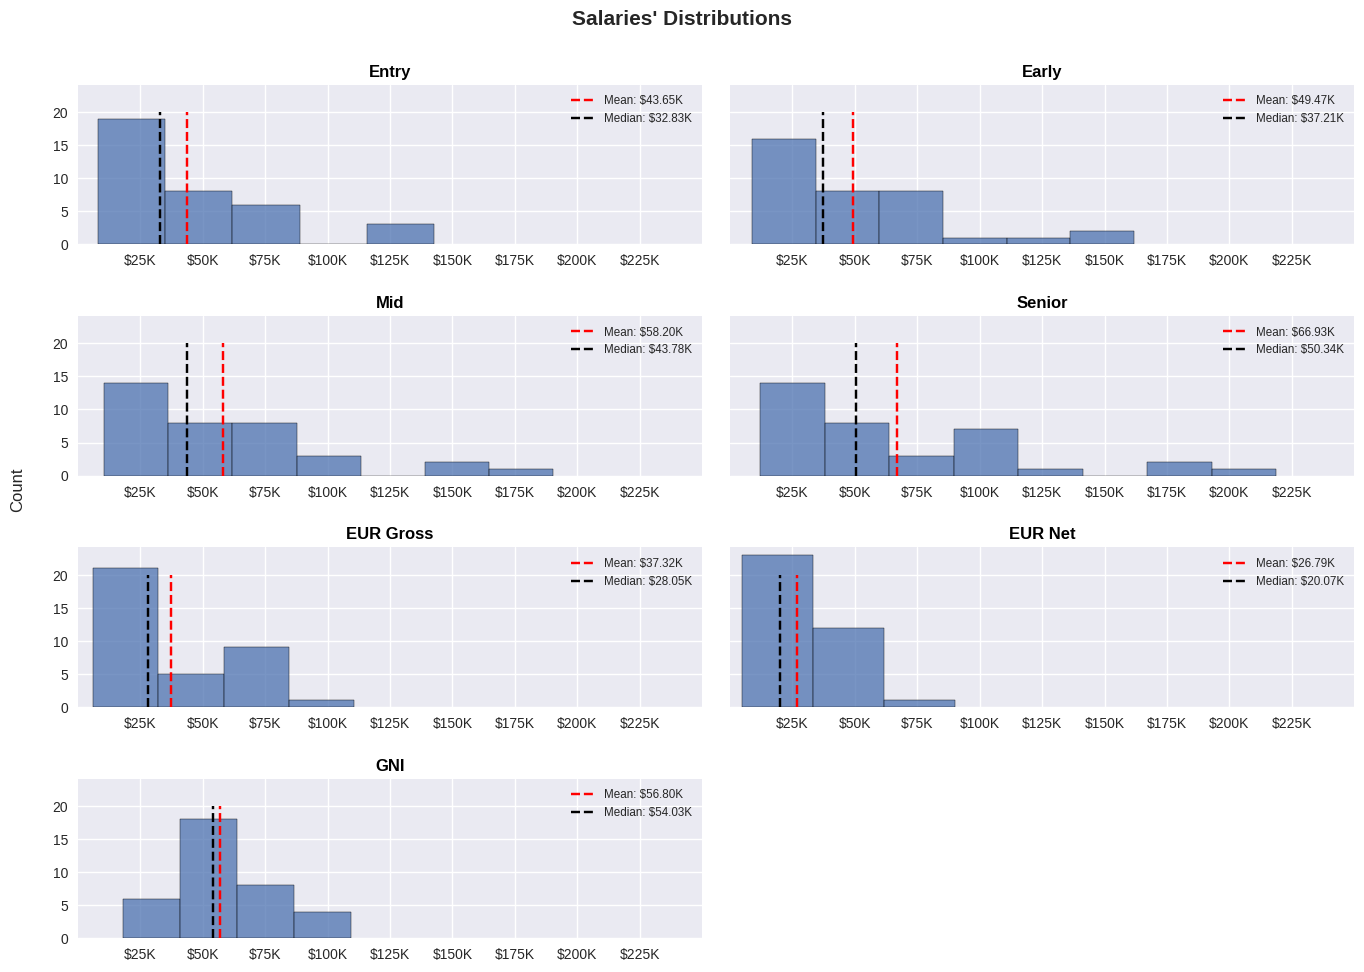

In [ ]:
cols1 = ['entry', 'early', 'mid', 'senior', 'gross_salary', 'net_salary', 'gni'] # features to investigate
cols1_mod = ['Entry', 'Early', 'Mid', 'Senior', 'EUR Gross', 'EUR Net', 'GNI'] # modified plot titles

#>>>>>>> helper func to format the salaries representation
def format_ticklabels(x, pos):
  return f'\${x/1000:.0f}K'

#>>>>>>> setting the scene
plt.style.use('seaborn-v0_8')
fig, axs = plt.subplots(4, 2, figsize=(14,10), sharey=True, sharex=False)

for ax, col, col_mod in zip(axs.flatten(), cols1, cols1_mod):
  sns.histplot(data=df, x=col, ax=ax, binwidth=25000, stat='count')

  #>>>>>>> formating mean and median vertical lines
  ax.vlines(df[col].mean(), ymin=0, ymax=20, colors='red',
            linestyles='dashed', label=f'Mean: \${df[col].mean()/1000:.2f}K')
  ax.vlines(df[col].median(), ymin=0, ymax=20, colors='black',
            linestyles='dashed', label=f'Median: \${df[col].median()/1000:.2f}K')

  #>>>>>>> formating title, x-y labels and legend for each plot
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_title(f"{col_mod}", loc='center',
               fontdict={'fontsize' : 12, 'color' : 'black'}, weight='bold')
  ax.legend(loc='upper right', frameon=False, fontsize='small')

  #>>>>>>> formating x-axis
  ax.set_xlim(0, 250000) # setting lower and upper limits values in x-axis
  ax.set_xticks(range(25000, 230001, 25000)) # constracting ticks for the x-axis
  ax.set_xticklabels(ax.get_xticks(), fontsize=10) # formating the x-tick labels
  ax.xaxis.set_major_formatter(FuncFormatter(format_ticklabels))

#>>>>>>> refining the scene
fig.delaxes(axs[3][1])
fig.supylabel('Count', fontsize=12)
fig.suptitle("Salaries' Distributions", fontsize=15, weight='bold')
fig.tight_layout(pad=2)

plt.show()

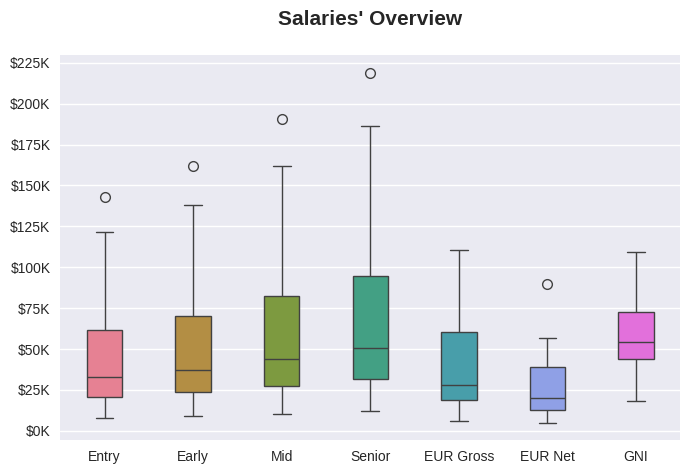

In [ ]:
#>>>>>>> setting the scene
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(8,5))

sns.boxplot(data=df[cols1], ax=ax, width=0.4)

#>>>>>>> formating x,y-axis
ax.yaxis.set_major_formatter(FuncFormatter(format_ticklabels))
ax.set_xticks(range(len(cols1)))
ax.set_xticklabels(['Entry', 'Early', 'Mid', 'Senior', 'EUR Gross', 'EUR Net', 'GNI'])
ax.set_yticks(range(0, 230000, 25000))

#>>>>>>> formating title, x-y labels
ax.set_title("Salaries' Overview\n", fontsize=15, weight='bold')
plt.show()

- There is a presence of extreme values in data.
- DS salaries increase gradually with respect to the level of experience.


In [ ]:
# looking for the country with extreme values (outliers)
iqr_plus = df_stats.loc['IQR_plus_75', cols1].dropna().index.tolist()

for col in iqr_plus:
  print(f"{col}\n{df.loc[df[col] > df_stats.loc['IQR_plus_75', col], 'country']}\n")

entry
32    Switzerland
Name: country, dtype: object

early
32    Switzerland
Name: country, dtype: object

mid
32    Switzerland
Name: country, dtype: object

senior
32    Switzerland
Name: country, dtype: object

net_salary
32    Switzerland
Name: country, dtype: object



In [ ]:
# country/-ies holding the lowest salaries
for col in ['entry', 'early', 'mid', 'senior', 'gross_salary', 'net_salary', 'gni']:
  print(f"{col}\n{df.loc[df[col] == df_stats.loc['Min', col], 'country']}\n")

entry
34    Ukraine
Name: country, dtype: object

early
34    Ukraine
Name: country, dtype: object

mid
34    Ukraine
Name: country, dtype: object

senior
34    Ukraine
Name: country, dtype: object

gross_salary
34    Ukraine
Name: country, dtype: object

net_salary
34    Ukraine
Name: country, dtype: object

gni
34    Ukraine
Name: country, dtype: object



- Switzerland holds the pole-post position in salaries but also differentiate itself from other European countries in terms of take-home-money (Net salary) in the general workforce, showing possibly different deduction policy.
- Ukraine holds the last position in salaries in general.
- Both these countries are not members of the European Union (EU)

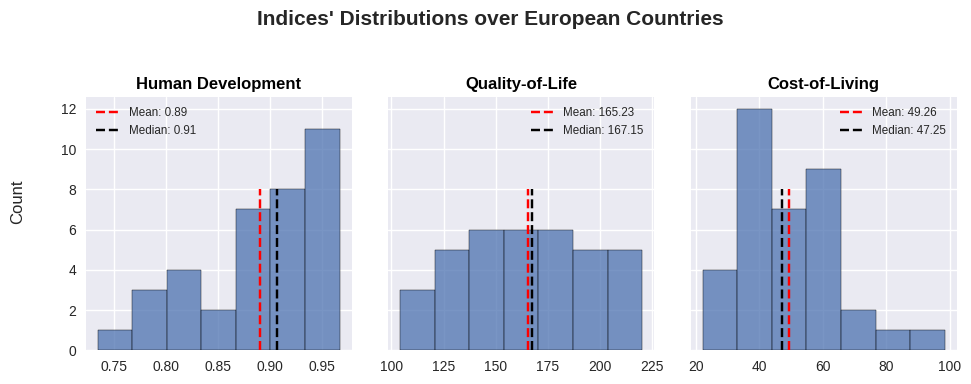

In [ ]:
cols2 = ['hdi', 'QoL_idx', 'CoL_idx'] # features to investigate
cols2_mod = ['Human Development', 'Quality-of-Life', 'Cost-of-Living'] # modified title names

#>>>>>>> setting the scene
plt.style.use('seaborn-v0_8')
fig, axs = plt.subplots(1, 3, figsize=(10,4), sharey=True)

for ax, col, col_mod in zip(axs.flatten(), cols2, cols2_mod):
  sns.histplot(data=df, x=col, ax=ax)

  #>>>>>>> formating mean and median vertical lines
  ax.vlines(df[col].mean(), ymin=0, ymax=8, colors='red',
            linestyles='dashed', label=f'Mean: {df[col].mean():.2f}')
  ax.vlines(df[col].median(), ymin=0, ymax=8, colors='black',
            linestyles='dashed', label=f'Median: {df[col].median():.2f}')

  #>>>>>>> formating title, x-y labels and legend for each plot
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_title(f"{col_mod}",
              loc='center', fontdict={'fontsize' : 12, 'color' : 'black'}, weight='bold')
  if col == 'hdi':
    ax.legend(loc='upper left', frameon=False, fontsize='small')
  else:
    ax.legend(loc='upper right', frameon=False, fontsize='small')

#>>>>>>> refining the scene
fig.supylabel('Count')
fig.suptitle("Indices' Distributions over European Countries", fontsize=15, weight='bold')
fig.tight_layout(pad=2)
plt.show()

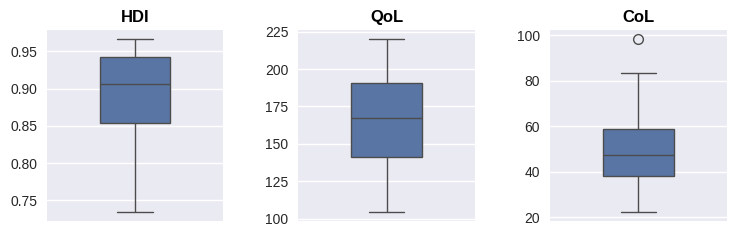

In [ ]:
#>>>>>>> setting the scene
plt.style.use('seaborn-v0_8')
fig, axs = plt.subplots(1,3, figsize=(8,3))

cols2_mod2 = ['HDI', 'QoL', 'CoL']

for ax, col, col_mod in zip(axs.flatten(), cols2, cols2_mod2):
  sns.boxplot(y = df[col], ax=ax, width=0.4)

  #>>>>>>> formating title, x-y labels
  ax.set_title(f"{col_mod}",
              loc='center', fontdict={'fontsize' : 12, 'color' : 'black'}, weight='bold')
  ax.set_xlabel('')
  ax.set_ylabel('')

fig.tight_layout(pad=3)
plt.show()

In [ ]:
very_high_hdi = round(len(df[df.hdi_tier == 'Very High']) / df.shape[0], 2)
print(f"Percentage of EUR countries with 'Very High' HDI Index: {very_high_hdi*100:.2f}%\n\n")
print(f"EUR countries with HDI index < 0.8:\n{df.loc[df.hdi < 0.8, ['country', 'region', 'hdi']]}\n\n")
print(f'Country with the highest HDI: {df.loc[df.hdi == df.hdi.max(), "country"].values[0]} -> {df.hdi.max()}')
print(f'Country with the lowest HDI: {df.loc[df.hdi == df.hdi.min(), "country"].values[0]} -> {df.hdi.min()}\n\n')
print(f'Country with the highest cost-of-living: {df.loc[df.CoL_idx == df.CoL_idx.max(), "country"].values[0]} -> {df.CoL_idx.max()}')
print(f'Country with the lowest cost-of-living: {df.loc[df.CoL_idx == df.CoL_idx.min(), "country"].values[0]} -> {df.CoL_idx.min()}')

Percentage of EUR countries with 'Very High' HDI Index: 89.00%


EUR countries with HDI index < 0.8:
                   country           region    hdi
0                  Albania  Southern Europe  0.789
4   Bosnia and Herzegovina  Southern Europe  0.779
5                 Bulgaria   Eastern Europe  0.799
34                 Ukraine   Eastern Europe  0.734


Country with the highest HDI: Switzerland -> 0.967
Country with the lowest HDI: Ukraine -> 0.734


Country with the highest cost-of-living: Switzerland -> 98.4
Country with the lowest cost-of-living: Russia -> 22.3


In [ ]:
df.groupby('region')[['entry', 'early', 'mid', 'senior']].agg(['max','min', 'mean', 'median', iqr, skew, kurtosis]).round(2).T

region           Eastern Europe  Northern Europe  Southern Europe  \
entry  max             30978.00        121572.00         38322.00   
       min              7857.00         24327.00         12780.00   
       mean            16806.38         59419.80         25656.55   
       median          16425.00         61348.50         23922.00   
       iqr              9531.00         28244.25         16209.00   
       skew                0.64             0.78             0.01   
       kurtosis           -0.42             0.48            -1.44   
early  max             35108.00        137782.00         43432.00   
       min              8905.00         27571.00         14484.00   
       mean            19047.25         67342.40         29077.36   
       median          18615.00         69528.00         27112.00   
       iqr             10801.75         32010.50         18370.00   
       skew                0.64             0.78             0.01   
       kurtosis           -0.42             0.48            -1.44   
mid    max             41304.00        162096.00         51096.00   
       min             10476.00         32436.00         17040.00   
       mean            22408.50         79226.40         34208.73   
       median          21900.00         81798.00         31896.00   
       iqr             12708.00         37659.00         21612.00   
       skew                0.64             0.78             0.01   
       kurtosis           -0.42             0.48            -1.44   
senior max             47500.00        186410.00         58760.00   
       min             12047.00         37301.00         19596.00   
       mean            25769.75         91110.40         39340.09   
       median          25185.00         94068.00         36680.00   
       iqr             14614.25         43307.50         24854.00   
       skew                0.64             0.78             0.01   
       kurtosis           -0.42             0.48            -1.44   

region           Western Europe  
entry  max            142740.00  
       min             51714.00  
       mean            80074.29  
       median          63144.00  
       iqr             37521.00  
       skew                0.97  
       kurtosis           -0.71  
early  max            161772.00  
       min             58609.00  
       mean            90750.86  
       median          71563.00  
       iqr             42524.00  
       skew                0.97  
       kurtosis           -0.71  
mid    max            190320.00  
       min             68952.00  
       mean           106765.71  
       median          84192.00  
       iqr             50028.00  
       skew                0.97  
       kurtosis           -0.71  
senior max            218868.00  
       min             79295.00  
       mean           122780.57  
       median          96821.00  
       iqr             57532.00  
       skew                0.97  
       kurtosis           -0.71

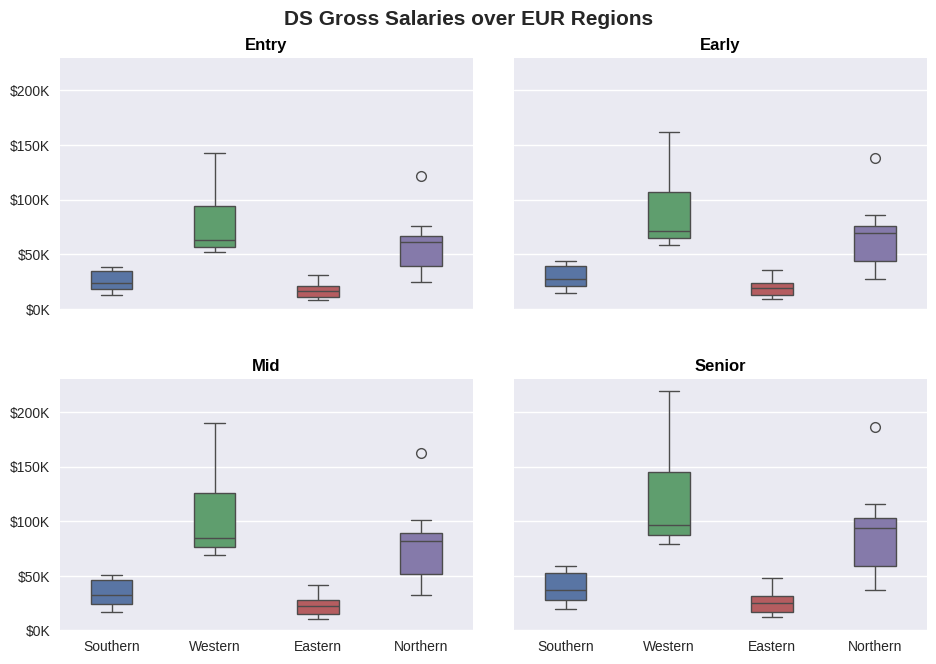

In [ ]:
cols_box = ['entry', 'early', 'mid', 'senior'] # columns to investigate

#>>>>>>> helper func to format the salaries representation
def format_salaries(x, pos):
  return f'\${x/1000:.0f}K'

#>>>>>>> setting the scene
plt.style.use('seaborn-v0_8')
fig, axs = plt.subplots(2, 2, figsize=(10,7),  sharex=True, sharey=True)

for ax, col in zip(axs.flatten(), cols_box):
  sns.boxplot(data=df, x='region', y=col, hue='region', ax=ax, width=0.4)

  #>>>>>>> formating the x-y axis
  ax.set_ylim(0, 230000)
  ax.yaxis.set_major_formatter(FuncFormatter(format_salaries))
  ax.set_xticks(range(4))
  ax.set_xticklabels(['Southern', 'Western', 'Eastern', 'Northern'])

  #>>>>>>> formating title, x-y labels and legend for each plot
  ax.set_title(f"{col.capitalize()}",
              loc='center', fontdict={'fontsize' : 12, 'color' : 'black'}, weight='bold')
  ax.set_xlabel('')
  ax.set_ylabel('')

#>>>>>>> refining the scene
fig.tight_layout(pad=3)
fig.suptitle('DS Gross Salaries over EUR Regions\n', fontsize=15, weight='bold')
plt.show()

DS gross salaries looks kind of supressed in Southern and even more in Eastern European countries compared with the Northern and Western European countries which seem more competitive in the market.

In [ ]:
df.groupby('region')[['hdi', 'QoL_idx', 'CoL_idx']].agg(['max','min', 'mean', 'median', iqr, skew, kurtosis]).round(2).T

region            Eastern Europe  Northern Europe  Southern Europe  \
hdi     max                 0.88             0.97             0.93   
        min                 0.73             0.88             0.78   
        mean                0.82             0.93             0.87   
        median              0.82             0.95             0.89   
        iqr                 0.05             0.04             0.07   
        skew               -0.67            -0.79            -0.81   
        kurtosis           -0.08            -1.05            -0.99   
QoL_idx max               153.90           209.90           184.40   
        min               115.00           164.70           104.30   
        mean              134.34           186.83           150.03   
        median            136.65           189.45           151.00   
        iqr                19.22            26.88            37.45   
        skew               -0.18            -0.06            -0.23   
        kurtosis           -1.29            -1.45            -1.00   
CoL_idx max                38.90            83.40            51.00   
        min                22.30            43.40            31.60   
        mean               31.44            58.80            43.32   
        median             34.35            58.95            43.50   
        iqr                10.80            14.52             6.70   
        skew               -0.40             0.56            -0.63   
        kurtosis           -1.53            -0.26            -0.46   

region            Western Europe  
hdi     max                 0.97  
        min                 0.91  
        mean                0.94  
        median              0.94  
        iqr                 0.02  
        skew               -0.00  
        kurtosis           -0.83  
QoL_idx max               220.10  
        min               166.30  
        mean              193.59  
        median            192.90  
        iqr                28.40  
        skew               -0.19  
        kurtosis           -1.30  
CoL_idx max                98.40  
        min                56.50  
        mean               65.33  
        median             60.50  
        iqr                 4.55  
        skew                1.91  
        kurtosis            1.87

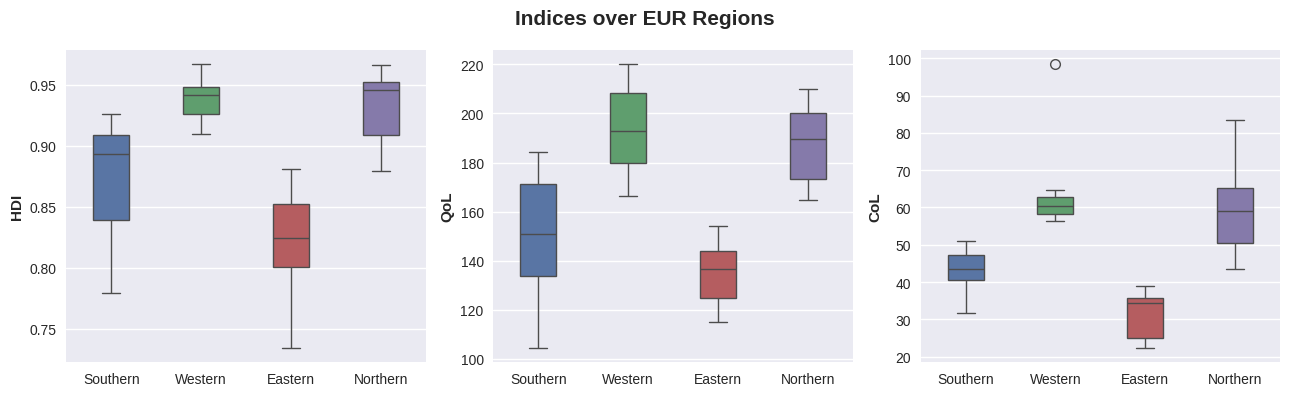

In [ ]:
colmns_idx = ['hdi', 'QoL_idx', 'CoL_idx'] # indices to examine
colmns_idx_mod = ['HDI', 'QoL', 'CoL'] # modified indices' names

#>>>>>>> setting the scene
plt.style.use('seaborn-v0_8')
fig, axs = plt.subplots(1,3, figsize=(13,4))

for ax, col, col_mod in zip(axs.flatten(), colmns_idx, colmns_idx_mod):
  sns.boxplot(data=df, x='region', y=col, hue='region', ax=ax, width=0.4)

  #>>>>>>> formating the x-y axis
  ax.set_xticks(range(4))
  ax.set_xticklabels(['Southern', 'Western', 'Eastern', 'Northern'])
  ax.set_xlabel('')
  ax.set_ylabel(f'{col_mod}', weight='bold')

#>>>>>>> formating title, x-y labels
fig.suptitle('Indices over EUR Regions', fontsize=15, weight='bold')
fig.tight_layout()
plt.show()

In [ ]:
# extreme value(s) in cost-of-living
print(df.country[df.CoL_idx > 90])

32    Switzerland
Name: country, dtype: object


In [ ]:
df_corr = df.corr(numeric_only=True).round(2)

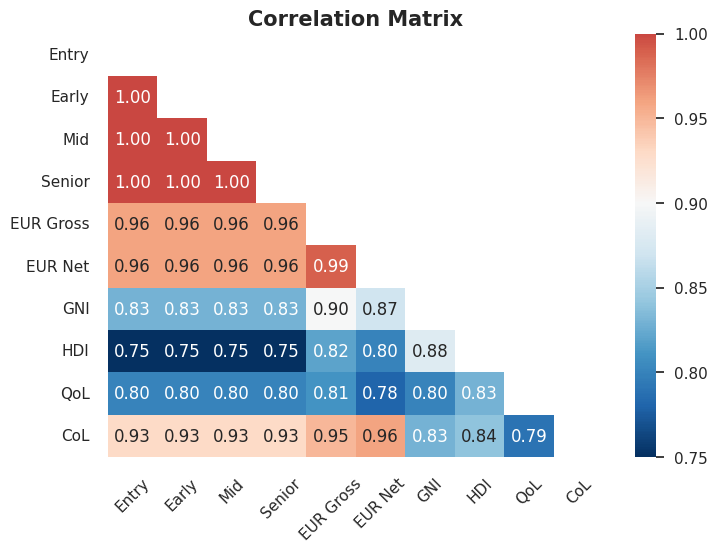

In [ ]:
sns.set_theme(style='white')

# adjusting the labels
labels = ['Entry', 'Early', 'Mid', 'Senior', 'EUR Gross', 'EUR Net', 'GNI', 'HDI', 'QoL', 'CoL']

# creating a mask so to filter out the upper triangular mirrored values
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# creating the heatmap
sns.heatmap(df_corr, annot=True, cmap='RdBu_r', xticklabels=labels, yticklabels=labels, mask=mask, center=0.9, fmt='.2f')

# refining the plot
plt.xticks(rotation=45)
plt.title('Correlation Matrix', fontsize=15, weight='bold')
plt.show()

### General Observations
- DS salaries vary a lot across European countries, regions, and the level of experience. The Western Europe is having the lead, whereas Eastern Europe takes the last position with the lowest salaries overall.
- DS salaries in Switzerland are extremely high comparing to the rest European countries and so the cost-of-living.
- Ukraine holds the lowest DS salaries overall in Europe.
- The general workforce gross salaries in Europe seem to be lower comparing to DS gross salaries.
- Although the mojority of the European countries (89%) have Very High HDI, there is an 11% (4 countries) left behind but still in high level.
- The cost-of-living is lower in South-East European countries comparing to Western-Northern ones in general.
- The quality-of-life seems to be descent in most European countries, but still varies.
- Overall, it seems the parameters we are using are correlated in some extend.


<a name='ob'></a>
## &#127919; _Objectives_

In this section we will:
- Conduct `Feature Engineering` to support the questions asked.
- Try to `answer the questions`:
  - **[Q1](#q1)**: _"How well paid is a Data Scientist in Europe relative to the general workforce?"_
  - **[Q2](#q2)**: _"Which European country/-ies is/are suitable for a Data Scientist' work, considering a sustainable standard of living?"_

<a name='fe'></a>
### _Feature Engineering_

To answer the questions i will create the following features:<br><br>
- $Net-to-Gross_\_ratio \;= \; \frac{WorkForce\_Salary\_Net}{WorkForce\_Salary\_Gross} $<br><br>
This ratio is a 'proxy' for effective tax & social contributions. Mind that actual tax rates and contributions may differ by income.<br><br>
- $Estimated\_DS\_Net\_Salary \; = \; DS\_Gross\_Salary \; \times \; Net-to-Gross_\_ratio$ <br><br>
We can make an estimation of the DS Net salary by incorporating the net_gross_ratio<br><br>
- $DS-to-Avg_\_ratio \quad (Gross-Net) \;= \; \frac{DS\_ExpeienceLevel\_Salary}{WorkForce\_Salary} \quad (Gross-Net)$<br><br>
We can categorize this ratio as follows:<br>
  - `High Ratio` ( $\;\ge\;$ 2.0) : Data scientists earn at least twice the country's average salary. This might indicate very high demand for data scientists or a shortage of skilled professionals in that location
  - `Moderate Ratio` (1.5 -- 2.0): Data scientists earn significantly above average, but not to an extreme degree. Could be due to a moderately strong tech sector or balanced supply-demand.
  - `Low Ratio` (~1 -- 1.5): Data scientists earn roughly the same or only modestly more than average. Possibly indicating:
    - Lower market valuation of data science roles
    - Over-saturation of talent, or
    - A generally high wage level across the entire workforce (meaning everyone earns more)<br><br>
- $DS\_Net\_adjusted \quad (per \; experience \; level) \;= \; Estimated\_DS\_Net \; \times \; \frac{100}{CoL\_idx}$<br><br>
$(\frac{100}{CoL\_idx})$ is a relative measure of how 'cheap' or 'expensive' a country or city is, compared to a baseline (eg. If a place has a CoL index of 120, then 100/120 $\approx$ 0.83. That indicates it's about 20% more expensive than the baseline).We multiply with this factor because:
  - It combines two factors: The outcome is a single number that simultaneously reflects the nominal salary and the local prices.
  - Purchasing Power: By scaling the salary up or down based on this factor you get an estimate of how many 'units' of a baseline city's goods and services you can buy
  - Easy Comparison: You can line up each country's 'Adjusted Salary' in one column and quickly see which location offers the best combination of pay vs. living costs. In other words, multiplying your salary by the factor $(\frac{100}{CoL\_idx})$ effectively answers _"If I take my salary in Country X and factor in how expensive or cheap it is there, how does it compare to a baseline city (often with CoL = 100)?"_ <br><br>

In [ ]:
# the net-gross ratio is a 'proxy' of effective tax and social contributions
df['net_gross_ratio'] = round(df['net_salary'] / df['gross_salary'], 2)

# using the net-gross ratio we can estimate the net salary of a Data Scientist for each country
df['estimated_entry_net'] = round(df['entry'] * df['net_gross_ratio'], 2)
df['estimated_early_net'] = round(df['early'] * df['net_gross_ratio'], 2)
df['estimated_mid_net'] = round(df['mid'] * df['net_gross_ratio'], 2)
df['estimated_senior_net'] = round(df['senior'] * df['net_gross_ratio'], 2)

# the (...)_gross_ratio interprets how many times larger (or smaller) the DS' gross salary is compared
# to the general workforce’s gross salary in each country
df['entry_gross_ratio'] = round(df['entry'] / df['gross_salary'], 2)
df['early_gross_ratio'] = round(df['early'] / df['gross_salary'], 2)
df['mid_gross_ratio'] = round(df['mid'] / df['gross_salary'], 2)
df['senior_gross_ratio'] = round(df['senior'] / df['gross_salary'], 2)

# the (...)_net_ratio is likely the most direct comparison of take-home pay between Data Scientists
# and average workers in each country
df['entry_net_ratio'] = round(df['estimated_entry_net'] / df['net_salary'], 2)
df['early_net_ratio'] = round(df['estimated_early_net'] / df['net_salary'], 2)
df['mid_net_ratio'] = round(df['estimated_mid_net'] / df['net_salary'], 2)
df['senior_net_ratio'] = round(df['estimated_senior_net'] / df['net_salary'], 2)

# we can adjust the Data Scientist's net salary wrt the cost-of-living
# dividing the DS's net salary by (CoL/100) to normalize the purchasing power.
# Higher results mean more purchasing power
df['entry_net_adjusted'] = round(df['estimated_entry_net'] * (100 / df['CoL_idx']), 2)
df['early_net_adjusted'] = round(df['estimated_early_net'] * (100 / df['CoL_idx']), 2)
df['mid_net_adjusted'] = round(df['estimated_mid_net'] * (100 / df['CoL_idx']), 2)
df['senior_net_adjusted'] = round(df['estimated_senior_net'] * (100 / df['CoL_idx']), 2)

<a name='q1'></a>
<br>
### **<font color='tomato'>Q1</font>**: _'How well paid is a data scientist in Europe relative to the general workforce in European Countries?'_
<br>

Here we will examine how well paid is a Data Scientist:
- Generaly in Europe.
- In European Regions (North, East, South, West).
- In countries themselves.

In [ ]:
# selecting the columns to work on
exp_net_ratio_colmns = ['country', 'region', 'entry_net_ratio',	'early_net_ratio',	'mid_net_ratio',	'senior_net_ratio']
df_q1 = df[exp_net_ratio_colmns]

In [ ]:
def IQR(x):
  return round(iqr(list(x)), 2)

df_q1_stats = df_q1[['entry_net_ratio',	'early_net_ratio',	'mid_net_ratio',	'senior_net_ratio']] \
              .agg(['max', 'min', 'mean', 'median', 'std', IQR]).round(2)
print(df_q1_stats)

        entry_net_ratio  early_net_ratio  mid_net_ratio  senior_net_ratio
max                1.62             1.84           2.16              2.48
min                0.83             0.94           1.11              1.28
mean               1.17             1.33           1.56              1.80
median             1.11             1.26           1.48              1.70
std                0.21             0.24           0.29              0.33
IQR                0.27             0.31           0.36              0.42


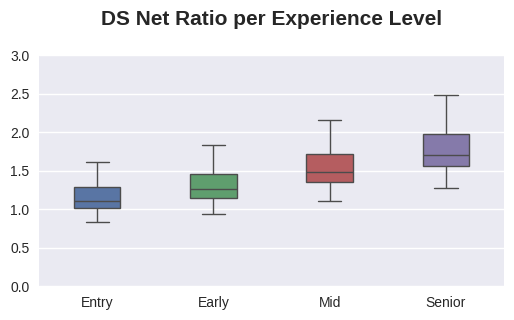

In [ ]:
net_ratio_cols = ['entry_net_ratio',	'early_net_ratio',	'mid_net_ratio',	'senior_net_ratio']

#>>>>>>> setting the scene
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(6,3))

sns.boxplot(data=df_q1[net_ratio_cols], ax=ax, width=0.4)

#>>>>>>> formating x,y-axis
ax.set_xticks(range(len(net_ratio_cols)))
ax.set_xticklabels(['Entry', 'Early', 'Mid', 'Senior'])
ax.set_yticks(np.linspace(0, 3, 7))

#>>>>>>> formating title, x-y labels
ax.set_title("DS Net Ratio per Experience Level\n", fontsize=15, weight='bold')
plt.show()

Senior DS roles hold the highest wage premiums vs. the general workforce.

In [ ]:
# how the DS growth changes from level to level??

# aggregating levels of experience to find the median values
df_q1_medians = df_q1[net_ratio_cols].agg('median').to_frame(name='median').T

# assessing the transition growth in between carrer levels
df_q1_medians['entry-early_diff'] = df_q1_medians.early_net_ratio - df_q1_medians.entry_net_ratio
df_q1_medians['early-mid_diff'] = df_q1_medians.mid_net_ratio - df_q1_medians.early_net_ratio
df_q1_medians['mid-senior_diff'] = df_q1_medians.senior_net_ratio - df_q1_medians.mid_net_ratio
df_q1_medians.drop(net_ratio_cols, axis=1, inplace=True)

# creating a func to identify and highlight the max-values over the columns
def highlight_max(s, props):
    is_max = (s == s.max())
    return [props if value else None for value in is_max]

# applying the styling func to the 'table' setting the decimal points -> 2
(df_q1_medians \
.style.apply(highlight_max, props = 'background-color: blue', axis=1) \
.format(precision=2)
)

,entry-early_diff,early-mid_diff,mid-senior_diff
median,0.15,0.22,0.22


There is a turning point on average DS growth with $\ge$ 5 years of experience compared with the general workforce in Europe.

In [ ]:
# what are the statistics by European region??

grp_region_q1 = df_q1.groupby('region')

regions = ['Western Europe', 'Northern Europe', 'Southern Europe', 'Eastern Europe']

# getting statistics for each region
for region in regions:
  grp_g1_region = grp_region_q1.get_group(region)[net_ratio_cols].agg(['max', 'min', 'mean', 'median', 'std', IQR]).round(2)
  print(f"{region}\n{grp_g1_region}\n\n")

Western Europe
        entry_net_ratio  early_net_ratio  mid_net_ratio  senior_net_ratio
max                1.52             1.72           2.03              2.33
min                0.87             0.99           1.16              1.34
mean               1.12             1.28           1.50              1.72
median             1.10             1.25           1.47              1.69
std                0.22             0.25           0.29              0.33
IQR                0.22             0.24           0.29              0.34


Northern Europe
        entry_net_ratio  early_net_ratio  mid_net_ratio  senior_net_ratio
max                1.57             1.77           2.09              2.40
min                1.01             1.15           1.35              1.55
mean               1.22             1.39           1.63              1.88
median             1.19             1.35           1.59              1.82
std                0.20             0.23           0.27              0.31
IQR  

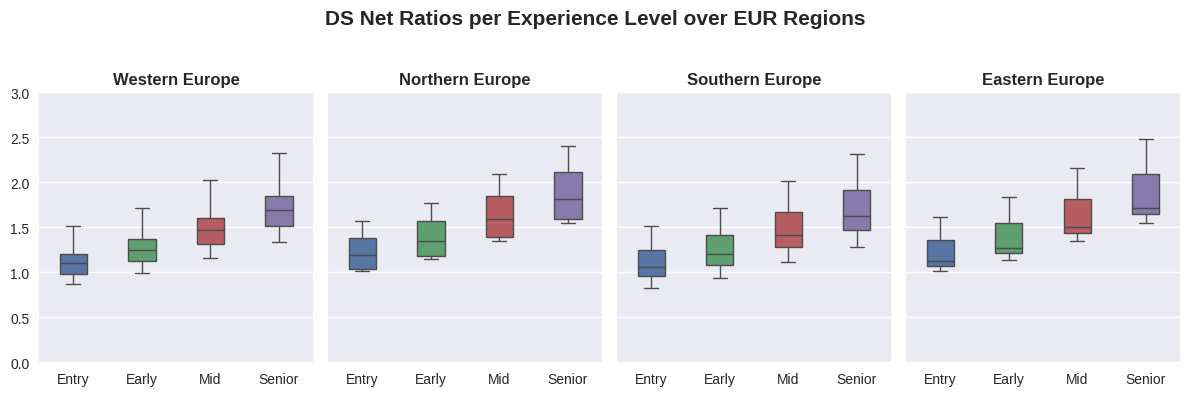

In [ ]:
# what's the distribution like in between experience level over European regions??

#>>>>>>> setting the scene
plt.style.use('seaborn-v0_8')
fig, axs = plt.subplots(1,4, figsize=(12,4), sharey=True)

for ax, region in zip(axs.flatten(), regions):
  sns.boxplot(data=grp_region_q1.get_group(region)[net_ratio_cols], ax=ax, width=0.4)

  #>>>>>>> formating x,y-axis
  ax.set_ylim(0, 3)
  ax.set_xticks(range(len(net_ratio_cols)))
  net_ratio_mod = ['Entry', 'Early', 'Mid', 'Senior']
  ax.set_xticklabels(net_ratio_mod)
  ax.set_title(f'{region}', fontsize=12, weight='bold')

fig.suptitle('DS Net Ratios per Experience Level over EUR Regions\n', fontsize=15, weight='bold')
fig.tight_layout()
plt.show()

- Senior DS premiums vary by region.
- Senior DS roles hold the highest wage premiums across all European Regions.

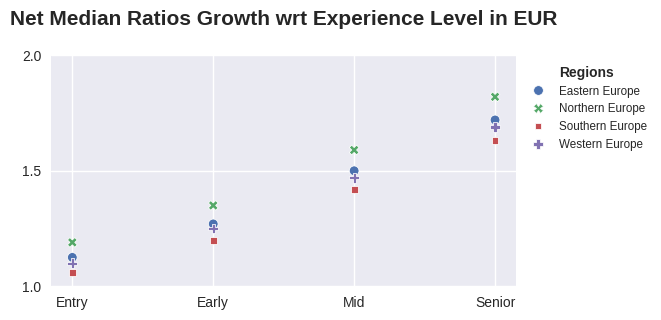

In [ ]:
# visualizing the trend of average ratio values over European regions by experience level

#>>>>>>> setting the scene
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(6,3))

#>>>>>>> base plot
sns.scatterplot(grp_region_q1[net_ratio_cols].agg('median').T, ax=ax)

net_ratio_mod = ['Entry', 'Early', 'Mid', 'Senior']
ax.set_xticks(range(len(net_ratio_cols)))
ax.set_xticklabels(net_ratio_mod)
ax.set_yticks(np.linspace(1, 2, 3))

#>>>>>>> title and refinements
ax.set_title('Net Median Ratios Growth wrt Experience Level in EUR\n', fontsize=15, weight='bold')
ax.legend(loc='upper left', frameon=False, fontsize='small',
          bbox_to_anchor=(1, 1), title='Regions', title_fontproperties={'weight' : 'bold'})

plt.show()

In [ ]:
# assessing the transition (difference) average DS growth in between carrer levels over EUR regions

grp_region_median_q1 = grp_region_q1[net_ratio_cols].agg('median')

# computing the average net-gross ratio differences
grp_region_median_q1['entry-early_diff'] = grp_region_median_q1.early_net_ratio - grp_region_median_q1.entry_net_ratio
grp_region_median_q1['early-mid_diff'] = grp_region_median_q1.mid_net_ratio - grp_region_median_q1.early_net_ratio
grp_region_median_q1['mid-senior_diff'] = grp_region_median_q1.senior_net_ratio - grp_region_median_q1.mid_net_ratio

# showing the highest transition growth values highlighted using the styling func we used before
grp_region_median_q1.style \
.hide(subset=net_ratio_cols, axis='columns') \
.apply(highlight_max, props = 'background-color: blue', axis=0) \
.format(precision=2)

,entry-early_diff,early-mid_diff,mid-senior_diff
region,,,
Eastern Europe,0.15,0.23,0.22
Northern Europe,0.16,0.24,0.23
Southern Europe,0.14,0.22,0.21
Western Europe,0.15,0.22,0.22


- The Northern European region holds the most significant multiples on average over the local general workforce salaries, followed by the Eastern European countries.
- Eastern and Western European regions share almost the same transition growth path on average compared to the local general workforces, with the Eastern region taking the lead slightly in the mid-level DS experience level.
- The Southern European region holds the lowest multiple growth on average over the local general workforce salaries.


In [ ]:
'''
how DS growth allocated by experience in EUR??

As mentioned in feature engineering section, we categorized the net-gross ratio as follows:
'high' : ratio >= 2
'moderate' : 1.5 <= ratio < 2
'low' : ratio < 1.5
'''

q1_pie = df_q1.drop(['country'], axis=1).copy()

def cat_net_ratio(x):
  if x >= 2:
    return 'high'
  elif (x<2) and (x>=1.5):
    return 'moderate'
  else:
    return 'low'

q1_pie['entry_cat'] = q1_pie.entry_net_ratio.apply(cat_net_ratio)
q1_pie['early_cat'] = q1_pie.early_net_ratio.apply(cat_net_ratio)
q1_pie['mid_cat'] = q1_pie.mid_net_ratio.apply(cat_net_ratio)
q1_pie['senior_cat'] = q1_pie.senior_net_ratio.apply(cat_net_ratio)
q1_pie = q1_pie.drop(['entry_net_ratio', 'early_net_ratio', 'mid_net_ratio', 'senior_net_ratio'], axis=1)

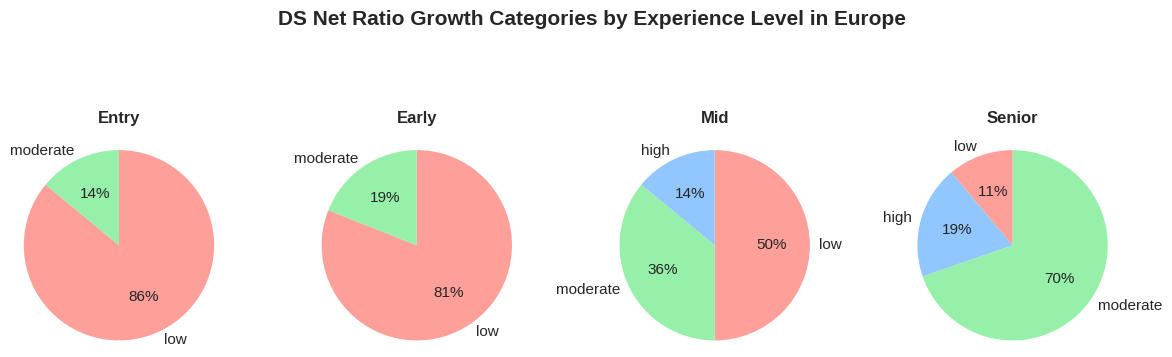

In [ ]:
plt.style.use('seaborn-v0_8-pastel')
fig, axs = plt.subplots(1, 4, figsize=(12,4))

colors = {'high' : 'C0', 'moderate' : 'C1', 'low' : 'C2'}

for ax, col, col_mod in zip(axs.flatten(), q1_pie.columns[1:], net_ratio_mod):
  sizes = round(q1_pie[col].value_counts() / q1_pie.shape[0], 2)
  labels = sizes.index.tolist()

  ax.pie(sizes, labels=labels, autopct='%.0f%%',
         radius=1.5, textprops={'fontsize': 11}, startangle=90, counterclock=False,
         colors=[colors[key] for key in labels])

  ax.set_title(f"{col_mod}\n\n", fontsize=12, weight='bold')

plt.suptitle('DS Net Ratio Growth Categories by Experience Level in Europe', fontsize=15, weight='bold', verticalalignment='bottom')
plt.tight_layout(pad=2)
plt.show()

- The majority of DS salaries  (\~83%) on average stay in low levels (\~1 -- 1.5x) with less than 5 years of experience compared to the local general workforce across European countries.
- DS salaries, on average, start to kick up a notch ($\ge$ 1.5x) after 5 years of experience in half of the European countries, covering almost 90% of the European countries after 10 years of experience.
- High DS salaries on average ($\ge$ 2x) are reached primarily in senior roles, covering roughly 20% of the European countries.

In [ ]:
reg_sorted = sorted(list(q1_pie.groupby('region').groups.keys()))

In [ ]:
plt.style.use('seaborn-v0_8-pastel')

colors = {'high' : 'C0', 'moderate' : 'C1', 'low' : 'C2'}

def plot_pie(reg):
  fig, axs = plt.subplots(1, 4, figsize=(12,4))

  df_reg = q1_pie.groupby('region').get_group(reg)

  for ax, col, col_mod in zip(axs.flatten(), q1_pie.columns[1:], net_ratio_mod):
    sizes = round(df_reg[col].value_counts() / df_reg.shape[0], 2)
    labels = sizes.index.tolist()

    ax.pie(sizes, labels=labels, autopct='%.0f%%',
          radius=1.5, textprops={'fontsize': 11}, startangle=90, pctdistance=0.7, counterclock=False,
           colors=[colors[key] for key in labels])

    hole = plt.Circle((0, 0), 0.65, facecolor='white')
    ax.add_artist(hole)

    ax.set_title(f"{col_mod}\n\n", fontsize=12, weight='bold')

  title = 'DS Net Ratio Growth Level by Experience at ' + f'{reg}'
  plt.suptitle(title, fontsize=15, weight='bold', verticalalignment='bottom')
  plt.tight_layout(pad=2)
  plt.show()

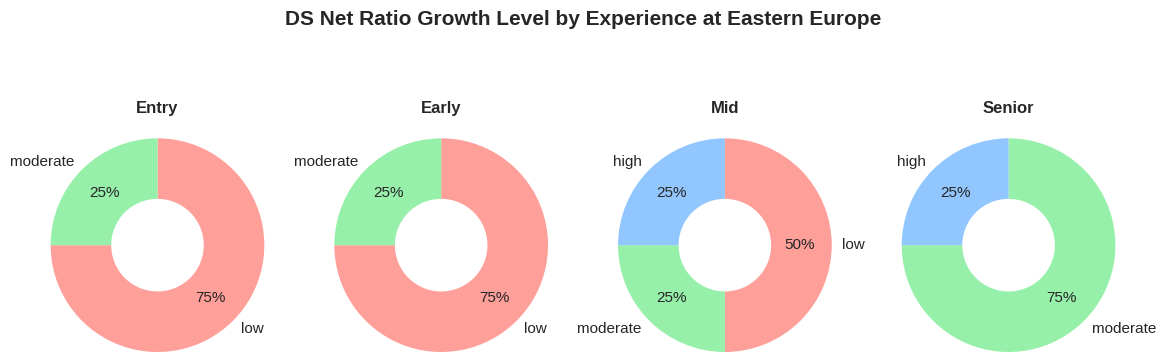

In [ ]:
plot_pie(reg_sorted[0])

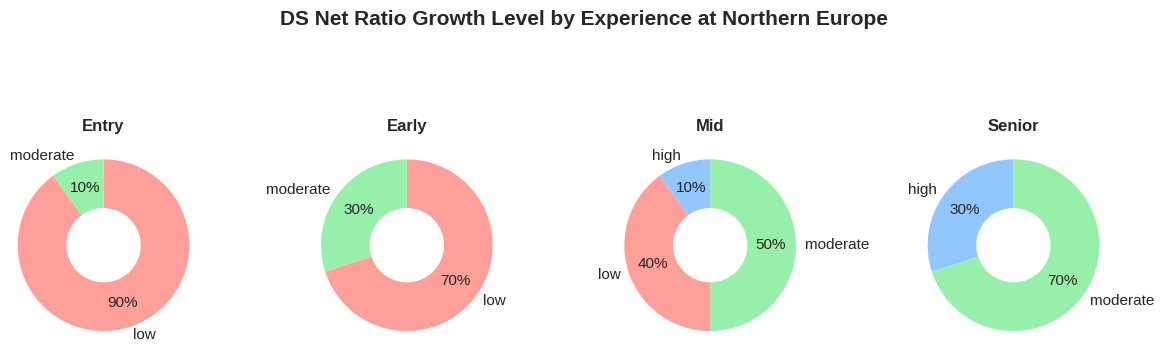

In [ ]:
plot_pie(reg_sorted[1])

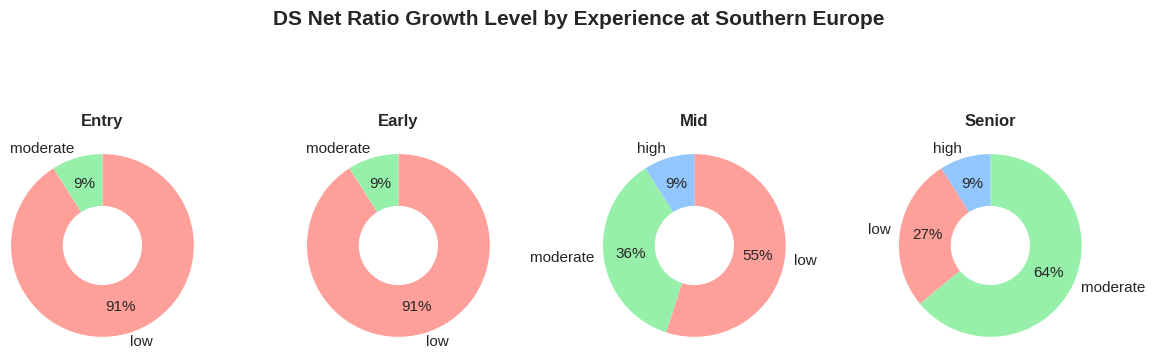

In [ ]:
plot_pie(reg_sorted[2])

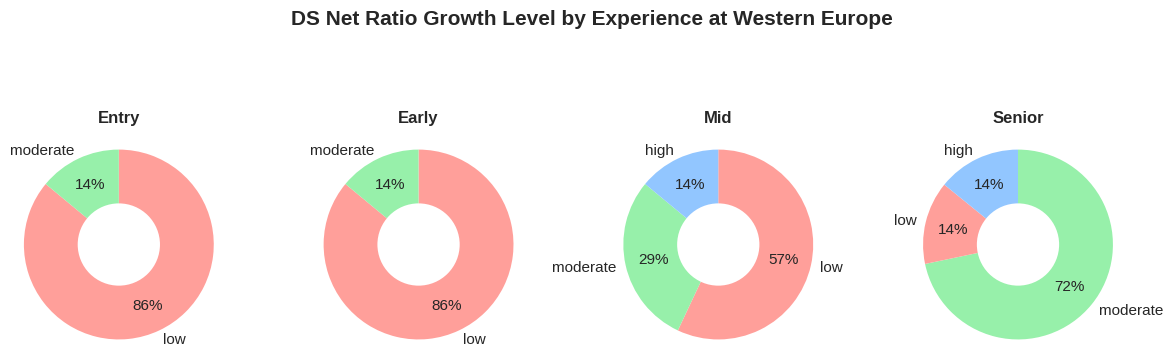

In [ ]:
plot_pie(reg_sorted[3])

Regionally:
- All European regions tend to compensate DS in low multiples ($\le 1.5$x) relative to the local general workforces in entry-level roles ($\le$ 2 years of experience), with the Southern region taking the lead, reaching ~90% of its countries.<br><br>
- In Southern and Western European regions, the majority of their countries (roughly 90%) keep DS salaries proportionally locked in low multiples ($\le 1.5$x) relative to the local general workforces with $\le$ 5 years of experience (entry and early career paths).<br><br>
- DS growth goes faster financially in Eastern and Northern European regions,  with $\le$ 5 years of experience, introducing moderate multiples ($\ge 1.5$x) relative to the local general workforces roughly in double of countries compared to Southern and Western ones.<br><br>
- Eastern and Northern European regions zeros low multiples ($\le 1.5$x) relative to the local general workforces in senior roles ($\ge$ 10 years of experience), while in Southern and Western ones countries are preserving low multiples especially in Southern region which reaches ~30% of its countries.<br><br>
- In Mid career DS salaries (5 -- 10 years of experience) the lead in high multiples ($\ge 2$x) holds the Eastern region with 25% of its countries, still with a 50% staying in low multiples ($\le 1.5$x) while in moderate multiples (between 1.5x and 2x) the lead holds the Northern region with 50% of its countries but with only 10% of its countries leveling up to higher multiples ($\ge 2$x).

In [ ]:
# assessing the transition (difference) average DS growth in between carrer levels over EUR countries
df_q1_countries = df_q1.drop(['region'], axis=1).set_index('country')

# computing the average net-gross ratio differences
df_q1_countries['entry-early_diff'] = df_q1_countries.early_net_ratio - df_q1_countries.entry_net_ratio
df_q1_countries['early-mid_diff'] = df_q1_countries.mid_net_ratio - df_q1_countries.early_net_ratio
df_q1_countries['mid-senior_diff'] = df_q1_countries.senior_net_ratio - df_q1_countries.mid_net_ratio
df_q1_countries.drop(net_ratio_cols, axis=1, inplace=True)

# creating funcs to highlight max values
def highlight_max2(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')

def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')

# showing the highest transition growth values highlighted using the above funcs
# column-wise (axis=0) : highlight max-value(s) -> magenta
# row-wise (axis=1) : color max-value(s) -> lime
# whole dataframe (axis=None) : highlight max-value(s) -> blue
(df_q1_countries.style\
.apply(highlight_max2, props = 'color: lime;', axis=1)\
.apply(highlight_min, props = 'color: gold;', axis=1)\
.apply(highlight_max2, props = 'background-color: green;', axis=0)\
.apply(highlight_max2, props = 'background-color: blue;', axis=None)\
.apply(highlight_min, props = 'background-color: red;', axis=0)
.format(precision=2))

,entry-early_diff,early-mid_diff,mid-senior_diff
country,,,
Albania,0.17,0.26,0.26
Austria,0.12,0.17,0.18
Belarus,0.15,0.24,0.23
Belgium,0.13,0.20,0.19
Bosnia and Herzegovina,0.14,0.22,0.21
Bulgaria,0.22,0.32,0.32
Croatia,0.21,0.30,0.30
Cyprus,0.17,0.26,0.26
Denmark,0.14,0.22,0.22


- Burgaria holds the most significant turnaround in DS salaries among all European countries, and in between all levels of experience, positioned itself in first place in DS salaries relative to the local general workforce.
- On the contrary, Greece, hand-in-hand with Malta, has the lowest turnarounds in DS salaries among all European countries. All levels of experience positioned them in the last two places in DS salaries relative to the local general workforces, with Greece keeping the lead in last place.

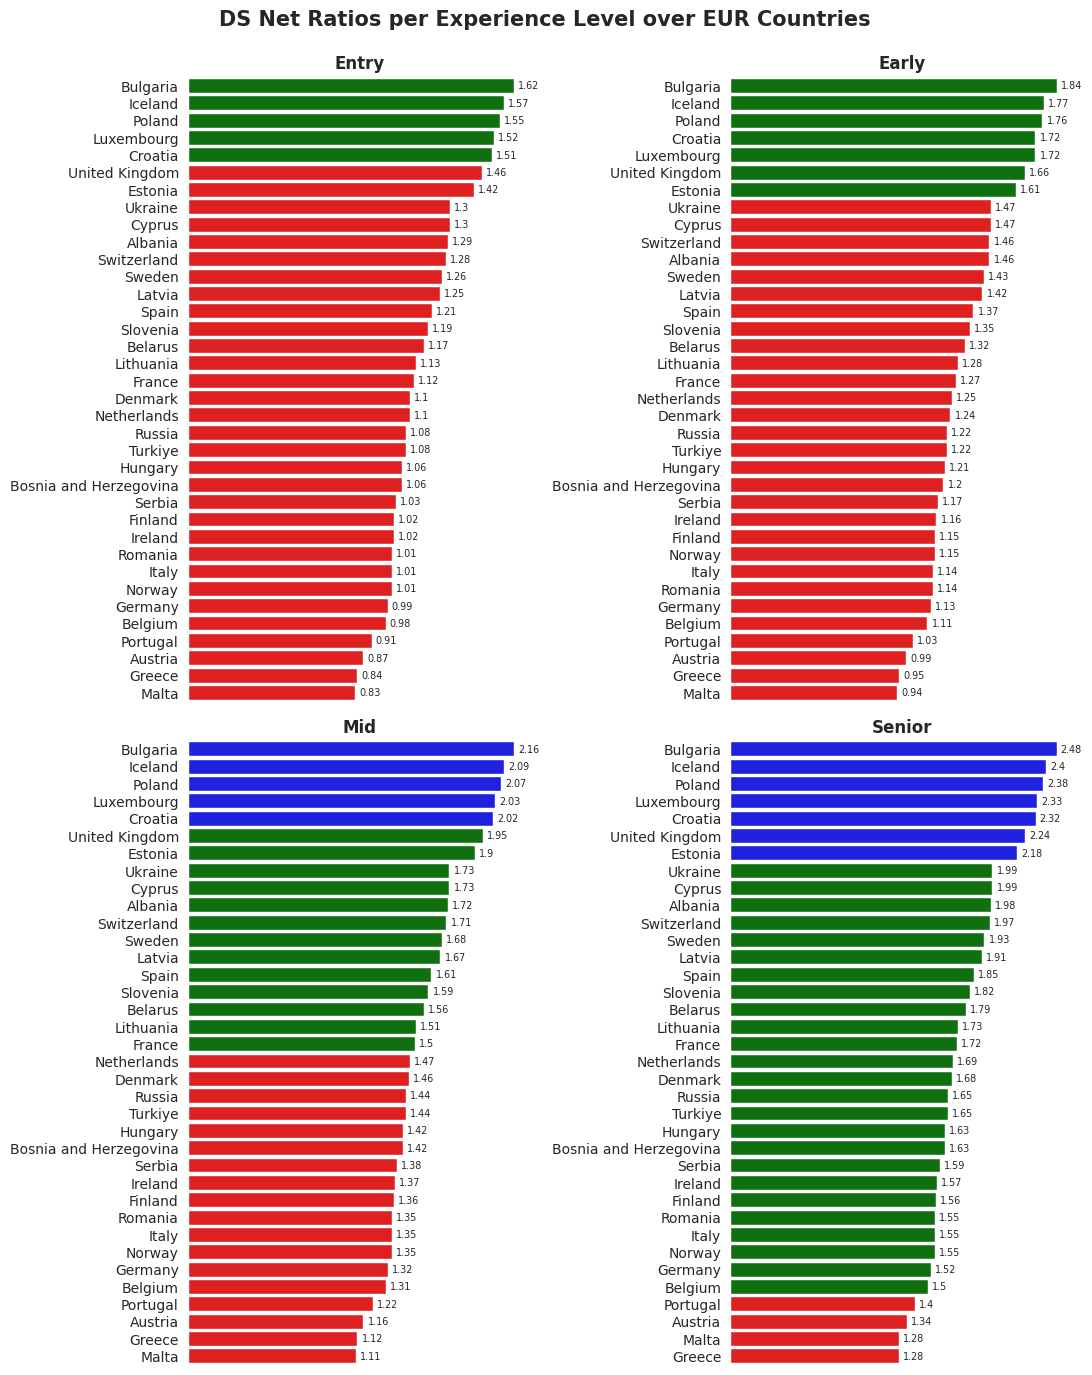

In [ ]:
# func coloring the bars according to ratio level:
# high ( >= 2) : blue
# moderate ( [1.5 - 2) ) : green
# low ( < 1.5) : red
def color_bar(x):
  if x >= 2:
    color = 'blue'
  elif (x<2) and (x>=1.5):
    color = 'green'
  else:
    color = 'red'
  return color

#>>>>>>>> setting the scene
plt.style.use('seaborn-v0_8-pastel')
sns.set_style('white')
fig, axs = plt.subplots(2,2, figsize=(11,14))

#>>>>>>>> iterating through experience levels to create the respective plots
for ax, col, col_mod in zip(axs.flatten(), exp_net_ratio_colmns[2:], net_ratio_mod):
  df_q1_sorted = df_q1.sort_values(by=col, ascending=False)
  color_net_ratio = [color_bar(x) for x in df_q1_sorted[col]]

  sns.barplot(df_q1_sorted, y='country', x=col, hue='country', palette=color_net_ratio, legend=False, ax=ax)
  ax.set_title(f"{col_mod}", fontsize=12, weight='bold')
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_xticklabels([])
  for i in ax.containers:
    ax.bar_label(i, padding=3, fontsize='x-small')

fig.suptitle('DS Net Ratios per Experience Level over EUR Countries\n', fontsize=15, weight='bold')
fig.tight_layout()
plt.show()

In [ ]:
# which are the top-5 countries giving the largest salaries relative to the local general workforce??

top5_countries = df_q1.sort_values(by=list(df_q1.columns)[::-1][:-2], ascending=False).head(5)

top5_countries = top5_countries.drop('region', axis=1).set_index('country')

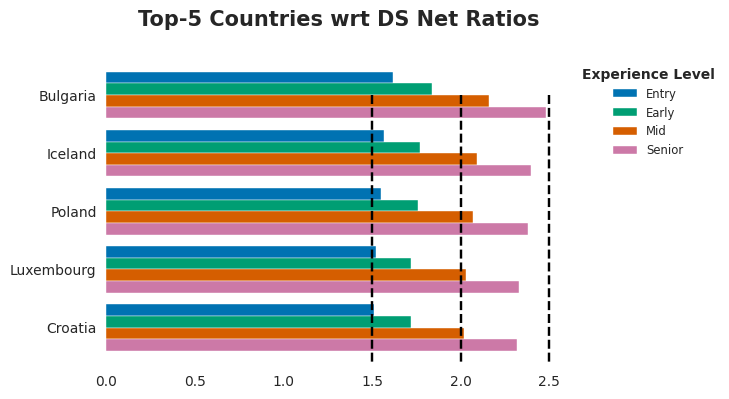

In [ ]:
# visualizing the top-5 countries

#>>>>>> setting the scene
plt.style.use('seaborn-v0_8-colorblind')
sns.set_style('white')

fig, ax = plt.subplots(figsize=(6,4))

#>>>>>> creating the plot
top5_countries.plot(kind='barh', width=0.8, ax=ax)
ax.invert_yaxis()

#>>>>>> refining the legend
ax.legend(labels=['Entry', 'Early', 'Mid', 'Senior'], loc='upper left', frameon=False, fontsize='small',
          bbox_to_anchor=(1, 1), title='Experience Level', title_fontproperties={'weight' : 'bold'})

#>>>>>> vertical lines
ax.vlines(2.5, ymin=0, ymax=10, colors='black', linestyles='dashed')
ax.vlines(1.5, ymin=0, ymax=10, colors='black', linestyles='dashed')
ax.vlines(2.0, ymin=0, ymax=10, colors='black', linestyles='dashed')

#>>>>>> titles and labels
ax.set_title('Top-5 Countries wrt DS Net Ratios\n', fontsize=15, weight='bold')
ax.set_ylabel('')
plt.show()

####Exploring correlation between your DS net ratio and GNI per capita (PPP).

GNI per Capita (PPP) measures a country's total income earned by its residents, adjusted for cost-of-living differences (purchasing power parity).
By comparing DS wage premiums (such as in our case DS net ratio) against GNI per capita (PPP), we can see if richer (higher GNI) countries tend to pay data scientists relatively more (or less) above the local average wage.

In [ ]:
# we will examine the Pearson correlation coefficient between each level of experience
# and the respective gni of a country
for expirience, exp_mod in zip(net_ratio_cols, ['Entry', 'Early', 'Mid', 'Senior']):
  coeff = round(pearsonr(df.gni, df_q1[expirience])[0], 2)
  print(f'Experience level: {exp_mod} -> correlation coefficient: {coeff}')

Experience level: Entry -> correlation coefficient: -0.07
Experience level: Early -> correlation coefficient: -0.06
Experience level: Mid -> correlation coefficient: -0.07
Experience level: Senior -> correlation coefficient: -0.07


There is no correlation between DS wage premiums and the GNI.

In [ ]:
df_corr_q1 = (pd.concat([df.gni, df_q1], axis=1)\
              .drop('region', axis=1)\
              .sort_values('gni', ascending=False)\
              .set_index('country'))

upper_gni = round(df_corr_q1.gni.quantile(.75), 2)
lower_gni = round(df_corr_q1.gni.quantile(.25), 2)

def ranking1(x):
  color = 'deepskyblue' if x>2 else 'lime' if 1.5<x<=2 else 'orangered'
  return f'color: {color}'

def ranking2(x):
  color = 'blue' if x>upper_gni else 'green' if lower_gni<=x<=upper_gni else 'crimson'
  return f'background-color: {color}'

(df_corr_q1.style
.map(ranking1, subset=net_ratio_cols)
.map(ranking2, subset=['gni'])
.format(precision=0, thousands=',', subset=['gni'])
.format(precision=2, subset=net_ratio_cols)
)

,gni,entry_net_ratio,early_net_ratio,mid_net_ratio,senior_net_ratio
country,,,,,
Norway,"109,260",1.01,1.15,1.35,1.55
Ireland,"97,370",1.02,1.16,1.37,1.57
Luxembourg,"93,600",1.52,1.72,2.03,2.33
Switzerland,"90,000",1.28,1.46,1.71,1.97
Netherlands,"80,080",1.10,1.25,1.47,1.69
Iceland,"79,750",1.57,1.77,2.09,2.40
Denmark,"79,430",1.10,1.24,1.46,1.68
Germany,"73,180",0.99,1.13,1.32,1.52
Austria,"72,910",0.87,0.99,1.16,1.34


- We found that countries with the highest GNI (like Austria and Belgium) have surprisingly low DS Net Ratios ($\le$1.5x), indicating a narrower pay gap between DS and other roles.
- Meanwhile, some lower-GNI countries (like Bulgaria at \$37k) see DS salaries that are ~2.5x above the local average.

#### <font color='skyblue'>Key Takeaways</font>
As data science continues to mature across the continent, `senior-level` roles (10+ years of experience) consistently command the `highest wage premiums` over local workforces in practically every corner of Europe. In particular, there is a turning point in a DS career once a practitioner crosses the `five-year mark`. <u>Before that point</u>, most data scientists earn salaries only `slightly above` the local average wage; beyond it, more substantial pay differentials begin to emerge.<br>

##### <font color='orange'>Experience-Driven Growth
- Across `83%` of European countries, `junior` ($\le$2 years) and `early` (2 -- 5 years) DS professionals typically see `low multiples` (roughly `1.0x to 1.5x`) relative to average salaries in their countries.
- As soon as practitioners enter the `mid-career` bracket (5 -- 10 years of experience), at least half of European countries see data scientists break into more `pronounced salary multiples` ($\ge$1.5x).
- By the `senior` bracket ($\ge$10 years), `90%` of European countries offer multiples of at least 1.5x, with around `20%` reaching `2x or higher` compared to the local average.<br>

##### <font color='orange'>Regional Contrasts
- `Northern Europe` emerges as a leader in `high DS pay multiples`, closely followed by `Eastern Europe`. In fact, many Northern and Eastern European countries completely `eliminate "low multiple" categories` ($\le$1.5x) at the senior level, indicating robust compensation for experienced DS professionals.
- `Southern Europe`, on the other hand, repeatedly registers the `lowest DS salary multiples`. Upwards of `90%` of its countries keep `entry- and early-career` DS salaries locked under `1.5x`, and even `senior` roles in about `30%` of Southern countries `fail to surpass that threshold`.
- `Western Europe` hovers between these two ends of the spectrum, sharing a broadly similar path to Eastern Europe's percentage of low vs. moderate multiples in the mid-level bracket, yet still landing behind Eastern Europe when it comes to generating high ($\ge$2x) multiples for mid-career professionals.<br>

##### <font color='orange'>Notable Standouts
- `Bulgaria` shows the `most dramatic pay transformation` among all European countries, topping the charts for DS premiums in every experience bracket. The data suggests a strong push for well-compensated data science roles despite Bulgaria's comparatively lower general workforce wages.
- `Greece` and `Malta` reside at the opposite extreme, consistently hitting the `lowest multiples` across `all` levels of DS experience. Greece, in particular, occupies the last position in nearly every category, reflecting a narrower pay gap between DS professionals and other workers—even at senior levels.<br>

##### <font color='orange'>Surprising Role of GNI
Interestingly, `no correlation` emerges between `GNI per capita (PPP)` and DS wage premiums. Countries with `high GNI` --such as `Austria and Belgium`-- often feature only `modest` pay differentials ($\le$1.5x) for data scientists, indicating a relatively compressed wage structure in these wealthier nations. Meanwhile, some lower-GNI countries (like `Bulgaria`, at around $37K GNI) boast DS salaries that hit `2.5x` or more of the local average. This pattern confirms that an economy's overall wealth level doesn't inherently dictate how generously it compensates specialized roles like data science—other factors, including labor-market supply and demand or local policy, may play an equally influential role.

##### <font color='orange'>Conclusion
These insights reinforce the premise that `years of DS experience` matter significantly across Europe: once a practitioner surpasses the `5-year mark`, their salary advantage grows faster than in most other professions. Yet `geography` also shapes these patterns — `Northern` and `Eastern` countries lead in DS wage premiums, `Southern` countries lag, and `Western` ones display a middle ground. Finally, the `lack of correlation` between DS wage multiples and `GNI` underlines that raw economic factors might not be the primary driver of advanced data-science compensation.<br>
This analysis paints a complex but vibrant landscape of European data science pay, revealing where ambitious data scientists can gain higher multiples over local averages and highlighting the turning points in a career when these leaps tend to materialize most strongly.


<a name='q2'></a>
<br>
### **<font color='tomato'>Q2</font>**: _'Which European country/-ies is/are suitable for a Data Scientist' work, considering a sustainable standard of living?'_
<br><br>
High multiples (premiums) are good, but would you settle to downsize? Would you sucrifice your standard of living for a better salary moving to such a country? what's the alternatives you have? Let's find out...<br><br>

For this question, I <u>will incorporate socio-economic factors</u> that can <u>reflect</u> to a Data Scientist's <u>growth and standard of living</u> such as the `HDI`, the `QoL index` and the `adjusted DS salary wrt cost-of-living`.<br>

Steps to follow:
1. `Select the features` we mentioned before.
2. `Scale the data` (the incorporated features are of different scale so there is a need of standardize them since we will work with distances).
3. `Visualize the data` (we can see how the data are structured in 2-D, if clusters are formed and how densed there are).
4. Implement `Classification` (will use the Hierarchical clustering because the dataset is small and we can see visually via the dendrogram how each country merges with others. Also, there is no need to pre-define number of clusters but will do that manually working with the dendrogram instead).
5. `Examine the characteristics` of the clusters and categorize them as such.
6. `Provide insights` on the clusters.



In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist

In [5]:
# with open('data_quest.pkl', 'rb') as f:
#   df = pickle.load(f)

<ipython-input-5-37f047d6a33f>:2: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  df = pickle.load(f)


#### Step 1: Select the features

In [6]:
# choosing the features to work with
df_q2_colmns = ['country', 'alpha3', 'region',
                'hdi', 'QoL_idx',
                'entry_net_adjusted', 'early_net_adjusted', 'mid_net_adjusted', 'senior_net_adjusted'
                ]

# construct the dataframe
df_q2 = df[df_q2_colmns]

# modifying the region names for readability
def mod_region(x):
  return x.split(' ')[0].strip()

df_q2['region'] = df_q2.region.apply(mod_region)

<ipython-input-6-2c473bce6930>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q2['region'] = df_q2.region.apply(mod_region)


#### Step 2: Scale the data

In [7]:
# we are going to create a dictionary consisting of 4 dictionaries for each experiece level to work with
experience_dict = {}

# we are iterate through the experience level
for col in df_q2_colmns[-4:]:

  experience_level = col.split('_')[0]

  # constructing a dict for the specific experience level
  experience_dict[experience_level] = {}

  # names of sub-dictionaries for each experience level
  df_name = f'{experience_level}_df'
  X_name = f'{experience_level}_X'
  X_scaled_name = f'{experience_level}_X_scaled'

  # 1.1 df -> selecting the standard columns we will use (from 'country' to 'gni')
  # 1.2 df -> concatenate the previous columns with the column representing the experience level
  df_standard = df_q2.loc[:, 'country':'QoL_idx']

  df_concat = pd.concat([df_standard, df_q2[col]], axis=1)
  experience_dict[experience_level][df_name] = df_concat

  # 2. df -> creating a dataframe with the features to cluster (HDI, QoL, 'experience_level'_adjusted)
  X = experience_dict[experience_level][df_name].iloc[:, 3:]
  experience_dict[experience_level][X_name] = X

  # 3. df -> create a dataframe with the scaled features to cluster
  sc = StandardScaler()
  X_scaled = sc.fit_transform(X)

  experience_dict[experience_level][X_scaled_name] = X_scaled

#### Step 3: Visualize the Data

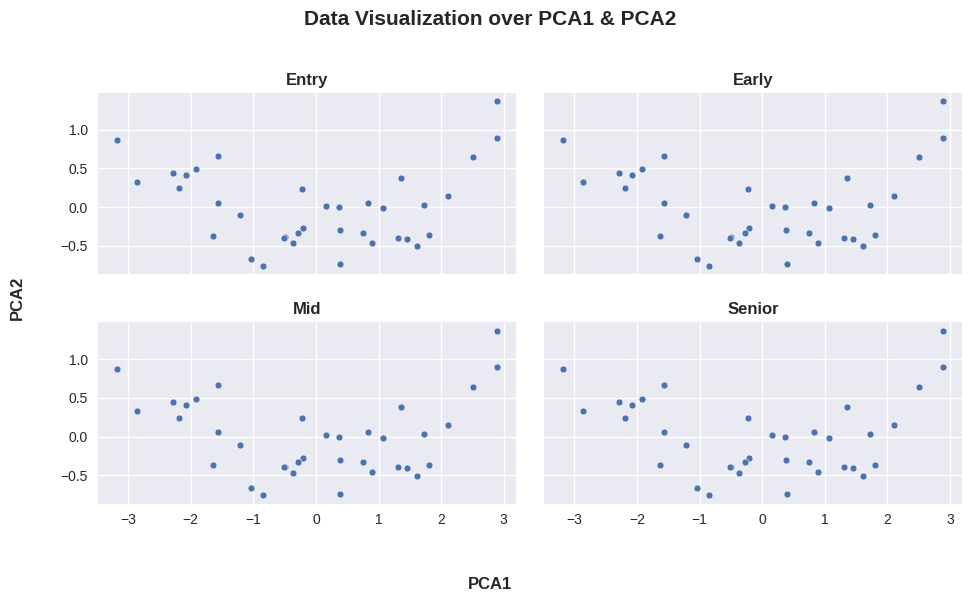

In [8]:
# visualizing the data using PCA to reduce dimensions to 2
plt.style.use('seaborn-v0_8')
fig, axs = plt.subplots(2,2, figsize=(10,6), sharex=True, sharey=True)

# iterating through the experience levels
for ax, experience_level in zip(axs.flatten(), experience_dict.keys()):

  # getting the data from the dict
  X_scaled = experience_dict[experience_level][f'{experience_level}_X_scaled']

  # creating an instance of PCA and fitting the data
  pca = PCA(n_components=2)
  pca_result = pca.fit_transform(X_scaled)

  # plotting our data
  sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], s=25, ax=ax)
  ax.set_title(f'{experience_level.capitalize()}', fontsize=12, weight='bold')

#refining the plot
fig.suptitle(f'Data Visualization over PCA1 & PCA2', fontsize=15, weight='bold')
fig.supxlabel('PCA1', fontsize=12, weight='bold')
fig.supylabel('PCA2', fontsize=12, weight='bold')
fig.tight_layout(pad=2)
plt.show()

We can observe that the plots are roughly identical, so we are going to proceed the clustering with one experience level. I will choose the 'entry-level' since it is the most challenging one.

#### Step 4: Clustering

In [9]:
# list of methods and metrics we will use to evaluate the linkage and decide which combination to use
methods = ['single', 'complete', 'average', 'ward']
metrics = ['euclidean', 'cityblock', 'cosine', 'mahalanobis']

In [10]:
# creating the combinations between methods and metrics (ward method works with euclidean by default)
combos = []
for method in methods:
  for metric in metrics:
    if (method == 'ward') and (metric == 'cityblock' or metric == 'cosine' or metric == 'mahalanobis'):
      continue
    combos.append((method, metric))

In [11]:
# evaluating the linkage using the cophenet coefficient

X = experience_dict['entry']['entry_X_scaled']

evaluations = {}
for combo in combos:
  Z = linkage(X, method=combo[0], metric=combo[1])
  coph = cophenet(Z, pdist(X))
  evaluations[combo] = coph[0]
  print(f'(method, metric): {combo} --> cophenet: {round(coph[0], 2)}')

max_cophenet = max(evaluations.values())
max_combo = [key for key, value in evaluations.items() if value == max_cophenet]
print(f'\nmax cophenet: {max_cophenet:.2f} --> combo: {max_combo}')

(method, metric): ('single', 'euclidean') --> cophenet: 0.68
(method, metric): ('single', 'cityblock') --> cophenet: 0.66
(method, metric): ('single', 'cosine') --> cophenet: 0.6
(method, metric): ('single', 'mahalanobis') --> cophenet: 0.43
(method, metric): ('complete', 'euclidean') --> cophenet: 0.65
(method, metric): ('complete', 'cityblock') --> cophenet: 0.68
(method, metric): ('complete', 'cosine') --> cophenet: 0.55
(method, metric): ('complete', 'mahalanobis') --> cophenet: 0.57
(method, metric): ('average', 'euclidean') --> cophenet: 0.71
(method, metric): ('average', 'cityblock') --> cophenet: 0.7
(method, metric): ('average', 'cosine') --> cophenet: 0.62
(method, metric): ('average', 'mahalanobis') --> cophenet: 0.61
(method, metric): ('ward', 'euclidean') --> cophenet: 0.68

max cophenet: 0.71 --> combo: [('average', 'euclidean')]


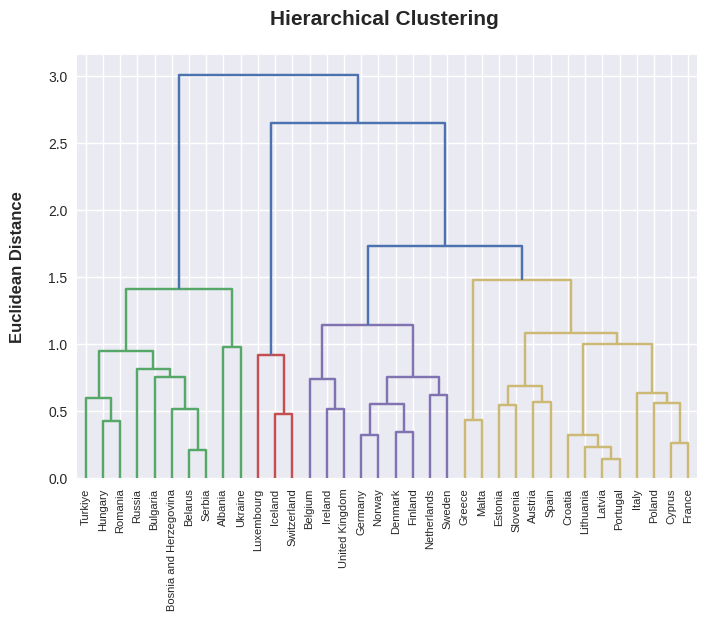

In [12]:
# creating the linkage with the highest performed method-metric combo
Z = linkage(X, method=max_combo[0][0], metric=max_combo[0][1])

# creating the dendrogram replacing indices with the actual countries so to be more readable
dendrogram(Z, color_threshold=1.6, labels=df_q2.country.to_list(), leaf_rotation=90)

plt.title('Hierarchical Clustering \n', fontsize=15, weight='bold')
plt.ylabel('Euclidean Distance\n', fontsize=12, weight='bold')
plt.show()

In [13]:
# from the dendrogram we can identify 3
hc_clusters = fcluster(Z, 1.6, criterion='distance')

In [14]:
hc_clusters

array([1, 4, 1, 3, 1, 1, 4, 4, 3, 4, 3, 4, 3, 4, 1, 2, 3, 4, 4, 4, 2, 4,
       3, 3, 4, 4, 1, 1, 1, 4, 4, 3, 2, 1, 1, 3], dtype=int32)

In [15]:
features = ['country', 'alpha3', 'region', 'gni', 'hdi', 'QoL_idx', 'entry_net_adjusted']
df_q2_new = df[features].copy()
df_q2_new.region = df_q2_new.region.apply(mod_region)
df_q2_new['cluster'] = pd.Series(hc_clusters, index=df_q2_new.index)

#### Step 5: Clusters' Characteristics

In [16]:
# how many countries are in each cluster?
df_q2_new.groupby('cluster')['country'].size()

,country
cluster,
1,10
2,3
3,9
4,14


In [17]:
# how are regions allocated in each cluster?
round(df_q2_new.groupby(['cluster','region'])['country'].size() / df_q2_new.groupby('cluster')['country'].count(), 1)

cluster  region  
1        Eastern     0.7
         Southern    0.3
2        Northern    0.3
         Western     0.7
3        Northern    0.7
         Western     0.3
4        Eastern     0.1
         Northern    0.2
         Southern    0.6
         Western     0.1
Name: country, dtype: float64

In [18]:
def cluster_characteristics(cluster_number, data):
  # getting the cluster's data
  mask = data[data.cluster == cluster_number].index
  data1 = data.loc[mask]

  # create bounderies to compare with using the original data
  upper_gni = round(data.gni.quantile(.75), 2)
  lower_gni = round(data.gni.quantile(.25), 2)

  upper_hdi = round(data.hdi.quantile(.75), 2)
  lower_hdi = round(data.hdi.quantile(.25), 2)

  upper_qol = round(data.QoL_idx.quantile(.75), 2)
  lower_qol = round(data.QoL_idx.quantile(.25), 2)

  upper_entry_adj = round(data.entry_net_adjusted.quantile(.75), 2)
  lower_entry_adj = round(data.entry_net_adjusted.quantile(.25), 2)

  '''
  in order to define the clusters' characteristics i decided to create categories over the values.
  for that reason, i compare the mean values of the cluster with the respective mean values
  of the original dataset
  '''
  if data1.gni.mean() >= upper_gni:
    gni_scope = 'High'
  elif (data1.gni.mean() < upper_gni) and (data1.gni.mean() >= lower_gni):
    gni_scope = 'Moderate'
  else:
    gni_scope = 'Low'

  if data1.hdi.mean() >= upper_hdi:
    hdi_scope = 'High'
  elif (data1.hdi.mean() < upper_hdi) and (data1.hdi.mean() >= lower_hdi):
    hdi_scope = 'Moderate'
  else:
    hdi_scope = 'Low'

  if data1.QoL_idx.mean() >= upper_qol:
    qol_scope = 'High'
  elif (data1.QoL_idx.mean() < upper_qol) and (data1.QoL_idx.mean() >= lower_qol):
    qol_scope = 'Moderate'
  else:
    qol_scope = 'Low'

  if data1.entry_net_adjusted.mean() >= upper_entry_adj:
    entry_adj_scope = 'High'
  elif (data1.entry_net_adjusted.mean() < upper_entry_adj) and (data1.entry_net_adjusted.mean() >= lower_entry_adj):
    entry_adj_scope = 'Moderate'
  else:
    entry_adj_scope = 'Low'

  region_allocation = (data1.groupby(['region'])['country'].count() / data1.shape[0]).round(1)
  countries_included = data1.sort_values(['entry_net_adjusted','QoL_idx'], ascending=False).loc[:, 'country'].tolist()
  cluster_stats = data1.iloc[:, 3:-1].agg(['max', 'min', 'mean']).round(2)

  print(f'Cluster {cluster_number}:')
  print(f'Number of Countries: {data1.shape[0]}\n')
  print(f'Region Allocation (%): \n{region_allocation}\n')

  print(f'Countries Included sorted by the Adjusted_Net_Salary (Net Salary vs CoL): \n{countries_included}\n\n')
  print(f'Cluster Stats:')
  print(f'{cluster_stats}\n\n')

  print(f'GNI Scope: {gni_scope}')
  print(f'HDI Scope: {hdi_scope}')
  print(f'QoL Scope: {qol_scope}')
  print(f'Salary Scope: {entry_adj_scope}')
  print('-' * 100)

#### Step 6: Insights

In [19]:
for cluster in [2,3,4,1]:
  cluster_characteristics(cluster, df_q2_new)

Cluster 2:
Number of Countries: 3

Region Allocation (%): 
region
Northern    0.3
Western     0.7
Name: country, dtype: float64

Countries Included sorted by the Adjusted_Net_Salary (Net Salary vs CoL): 
['Luxembourg', 'Switzerland', 'Iceland']


Cluster Stats:
           gni   hdi  QoL_idx  entry_net_adjusted
max   93600.00  0.97   220.10           121009.44
min   79750.00  0.93   202.00           106411.94
mean  87783.33  0.95   209.03           114973.59


GNI Scope: High
HDI Scope: High
QoL Scope: High
Salary Scope: High
----------------------------------------------------------------------------------------------------
Cluster 3:
Number of Countries: 9

Region Allocation (%): 
region
Northern    0.7
Western     0.3
Name: country, dtype: float64

Countries Included sorted by the Adjusted_Net_Salary (Net Salary vs CoL): 
['United Kingdom', 'Netherlands', 'Sweden', 'Ireland', 'Denmark', 'Norway', 'Germany', 'Finland', 'Belgium']


Cluster Stats:
            gni   hdi  QoL_idx  entry_

After applying hierarchical clustering to each country's HDI, Quality-of-Life (QoL), and net-adjusted salary (accounting for cost-of-living) for data scientists in entry level, we identified four distinct 'tiers' of European countries as follows:

1. Elite Tier (originally 'Cluster \#2')
2. High-Performing Tier (originally 'Cluster \#3')
3. Moderate Tier (originally 'Cluster \#4')
4. Emerging Tier (originally 'Cluster \#1')

Below is a breakdown of these tiers, including key country groupings, average stats, and what they mean for data scientists considering relocation or comparison of salaries.

## <font color='dodgerblue'>**Elite Tier**</font> (Cluster \#2)
1. <u>Countries</u><br>
    Luxembourg, Switzerland, Iceland
2. <u>Key Stats</u><br>
  - GNI: $\approx\;$\$80K -- \$94K (High)
  - HDI: $\approx\;$0.93 -- 0.97 (High)
  - QoL: $\approx\;$202 -- 220 (High)
  - Net Adjusted DS Dalary: $\approx\;$\$106K -- \$121K (High)
3. <u>Description</u><br>
  - These countries offer top-tier living standards (high HDI, top-notch QoL) and extremely competitive data scientist salaries, even after factoring in cost-of-living.
  - _Upside_: Ideal for data scientists seeking the very best pay-lifestyle combination.
  - _Downside_: Correspondingly high living costs (rent, services) can offset some of the salary advantage.<br><br>

## <font color='springgreen'>**High-Performing Tier**</font> (Cluster \#3)
1. <u>Countries</u><br>
    United Kingdom, Netherlands, Sweden, Ireland, Denmark, Norway, Germany, Finland, Belgium
2. <u>Key Stats</u><br>
  - GNI: $\approx\;$\$58K -- \$109K (High)
  - HDI: $\approx\;$0.94 -- 0.97 (High)
  - QoL: $\approx\;$166 -- 211 (Moderate-High)
  - Net Adjusted DS Dalary: $\approx\;$\$65 -- \$88K (High)
3. <u>Description</u><br>
  - These countries remain very competitive in global terms, featuring robust economies, high HDI, and strong salaries for data scientists.
  - They trail the Elite Tier slightly in pay or cost-of-living efficiency, but still represent excellent destinations for well-compensated DS roles.<br><br>

## <font color='orange'>**Moderate Tier**</font> (Cluster \#4)
1. <u>Countries</u><br>
    Spain, France, Cyprus, Poland, Austria, Estonia, Italy, Slovenia, Croatia, Latvia, Portugal, Lithuania, Malta, Greece
2. <u>Key Stats</u><br>
  - GNI: $\approx\;$\$41K -- \$73K (Moderate)
  - HDI: $\approx\;$0.87 -- 0.93 (Moderate)
  - QoL: $\approx\;$133 -- 193 (Moderate)
  - Net Adjusted DS Dalary: $\approx\;$\$33 -- \$68K (Moderate)
3. <u>Description</u><br>
  - These countries occupy a middle ground: decent infrastructure and livability, but not top-tier pay scales.
  - Many data scientists might still find a balanced lifestyle here, as day-to-day expenses can be lower relative to the Elite/High-Performing tiers.
  - Potentially ideal for those valuing culture, climate, or personal ties over maximum salary.<br><br>

## <font color='tomato'>**Emerging Tier**</font> (Cluster \#1)
1. <u>Countries</u><br>
    Bulgaria, Russia, Hungary, Belarus, Romania, Serbia, Bosnia and Herzegovina, Turkiye, Albania, Ukraine
2. <u>Key Stats</u><br>
  - GNI: $\approx\;$\$18K -- \$47K (Low)
  - HDI: $\approx\;$0.73 -- 0.86 (Low)
  - QoL: $\approx\;$104 -- 145 (Low)
  - Net Adjusted DS Dalary: $\approx\;$\$25 -- \$45K (Low)
3. <u>Description</u><br>
  - These nations show lower macro-economic and social metrics on average, leading to correspondingly lower DS salaries.
  - Nevertheless, they can offer growth opportunities for data scientists, especially if local tech sectors are expanding or if a DS professional is working remotely with a foreign-based firm.
  - Living costs are often lower, so the real purchasing power might still be acceptable for certain lifestyles or personal preferences.<br><br>

---
###Summary Table
|**Tier**|**Countries**|**HDI (Scope)**|**QoL (Scope)**|**Adjusted Net Salary**|
|:---:||:---:|:---:|:---:|
|**Elite**|Luxembourg, <br>Switzerland, <br>Iceland| High| High| High <br>($\approx\;$\$106K -- \$121K)|
|:---:|:---:|:---:|:---:|:---:|
|**High**|United Kingdom, <br>Netherlands, <br>Sweden, <br>Ireland, <br>Denmark, <br>Norway, <br>Germany, <br>Finland, <br>Belgium| High| Moderate-High| High <br>($\approx\;$\$65 -- \$88K)|
|:---:|:---:|:---:|:---:|:---:|
|**Moderate**|Spain, <br>France, <br>Cyprus, <br>Poland, <br>Austria, <br>Estonia, <br>Italy, <br>Slovenia, <br>Croatia, <br>Latvia, <br>Portugal, <br>Lithuania, <br>Malta, <br>Greece| Moderate| Moderate| Moderate <br> ($\approx\;$\$33 -- \$68K)|
|:---:|:---:|:---:|:---:|:---:|
|**Emerging**|Bulgaria, <br>Russia, <br>Hungary, <br>Belarus, <br>Romania, <br>Serbia, <br>Bosnia and Herzegovina, <br>Turkiye, <br>Albania, <br>Ukraine| Low | Low | (Low) <br> ($\approx\;$\$25 -- \$45K)|

<br><br>
###Remarks
- _Elite vs. High_: The 'Elite Tier' group (Cluster \#2) edges out the 'High-Performing Tier' (Cluster \#3) in salary and certain QoL metrics, though both are strong on HDI.
- _Moderate Tier_: Sits in a comfortable mid-range for someone seeking a balance of salary, living costs, and culture might find these countries appealing.
- _Emerging Tier_: Though lower on every metric, these places can still be stepping stones for data scientists wanting to shape evolving tech scenes or enjoy a lower overall cost of living.

<br><br>
Moving on, I present these data sorted by:
1. Net Adjusted Salaries (for those who value more higher compensations over QoL)
2. QoL (for those who value more QoL over higher compensations)


In [27]:
#  value more Salary than QoL?? clusters sorted by net_adjusted salary & QoL
for cluster, tier in zip([2,3,4,1], ['Elite Tier', 'High-Performing Tier', 'Moderate Tier', 'Emerging Tier']):
  print(f'Cluster {cluster} --> {tier}')
  print((df_q2_new[['country', 'gni', 'hdi', 'QoL_idx', 'entry_net_adjusted']][df_q2_new.cluster == cluster]
        .sort_values(['entry_net_adjusted','QoL_idx'], ascending=False)), end='\n\n\n')

Cluster 2 --> Elite Tier
        country      gni    hdi  QoL_idx  entry_net_adjusted
20   Luxembourg  93600.0  0.927    220.1           121009.44
32  Switzerland  90000.0  0.967    205.0           117499.39
15      Iceland  79750.0  0.959    202.0           106411.94


Cluster 3 --> High-Performing Tier
           country       gni    hdi  QoL_idx  entry_net_adjusted
35  United Kingdom   58140.0  0.940    174.5            87961.62
22     Netherlands   80080.0  0.946    211.3            86810.88
31          Sweden   71780.0  0.952    193.2            83001.25
16         Ireland   97370.0  0.950    166.5            77705.82
8          Denmark   79430.0  0.952    209.9            72271.21
23          Norway  109260.0  0.966    195.0            70669.57
12         Germany   73180.0  0.950    190.2            68117.67
10         Finland   64400.0  0.942    203.8            66590.19
3          Belgium   72470.0  0.942    169.3            65019.82


Cluster 4 --> Moderate Tier
      country 

In [28]:
# value more QoL than salary?? clusters sorted by QoL & net_adjusted salary
for cluster, tier in zip([2,3,4,1], ['Elite Tier', 'High-Performing Tier', 'Moderate Tier', 'Emerging Tier']):
  print(f'Cluster {cluster} --> {tier}')
  print((df_q2_new[['country', 'gni', 'hdi', 'QoL_idx', 'entry_net_adjusted']][df_q2_new.cluster == cluster]
        .sort_values(['QoL_idx', 'entry_net_adjusted'], ascending=False)), end='\n\n\n')

Cluster 2 --> Elite Tier
        country      gni    hdi  QoL_idx  entry_net_adjusted
20   Luxembourg  93600.0  0.927    220.1           121009.44
32  Switzerland  90000.0  0.967    205.0           117499.39
15      Iceland  79750.0  0.959    202.0           106411.94


Cluster 3 --> High-Performing Tier
           country       gni    hdi  QoL_idx  entry_net_adjusted
22     Netherlands   80080.0  0.946    211.3            86810.88
8          Denmark   79430.0  0.952    209.9            72271.21
10         Finland   64400.0  0.942    203.8            66590.19
23          Norway  109260.0  0.966    195.0            70669.57
31          Sweden   71780.0  0.952    193.2            83001.25
12         Germany   73180.0  0.950    190.2            68117.67
35  United Kingdom   58140.0  0.940    174.5            87961.62
3          Belgium   72470.0  0.942    169.3            65019.82
16         Ireland   97370.0  0.950    166.5            77705.82


Cluster 4 --> Moderate Tier
      country 